In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import mw_protocol.routing as routing
import mw_protocol.spreading as spreading
import mw_protocol.saving as saving
import mw_protocol.plotting as plotting
import mw_protocol.toolbox as tb
import seaborn as sns
import cProfile

In [2]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
# To change to your personal directory
script_folder = "/nfs/see-fs-01_users/eeymr/work/scripts/mw_protocol/"

# Creating input algorithm

## Create Input Files

We present the summary method to produce the meltwater input files as first introduced in https://doi.org/10.1029/2022PA004451. There is also a plain py script available to be run offline.

In [7]:
# INPUT PARAMETERS

folder_name="/nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj"
file_name="xpfj.wfix.glac_test.nc"

sav_routed=False
sav_spread=False

mode_lon="double"
mode_shape="cross"
n_smooth=0
reuse_weights=False
ice_sheet='GLAC-1D'
waterfix='GLAC_1D'
flux_unit="m3/s"

start_year = None
end_year = None
time_step = None

In [8]:
# INPUT DATASET

start_ky = start_year/1000 if start_year is not None else None
end_ky = end_year/1000 if end_year is not None else None

ds_lsm = xr.open_dataset(f"{script_folder}/data/temev.qrparm.omask.nc")
ds_hice = xr.open_dataset(f"{script_folder}/data/GLAC1DHiceF26.nc").sel(T122KP1=slice(start_ky, end_ky))
ds_pointer = xr.open_dataset(f"{script_folder}/data/GLAC1DdrainagePointerF26ka.nc").sel(T40H1=slice(start_ky, end_ky))
ds_wfix = xr.open_dataset(f"{script_folder}/data/temev.qrparm.waterfix.nc")


In [6]:
# ROUTING ALGORITHM

ds_routed = routing.routing(ds_hice, ds_pointer, ds_lsm, flux_unit=flux_unit, mode_lon=mode_lon,
                            mode_shape=mode_shape, n_smooth=n_smooth, t_debug=5, reuse_weights=reuse_weights,
                            ice_sheet=ice_sheet, waterfix="None")

if sav_routed:
    saving.create_output_directory(folder_name)
    if file_name[-3:]==".nc":
        ds_routed.to_netcdf(f"{folder_name}/{file_name}")
        print(f"Routed file saved at {folder_name}/routed.{file_name}")
    else:
        ds_routed.to_netcdf(f"{folder_name}/{file_name}.nc")
        print(f"Routed file saved at {folder_name}/routed.{file_name}.nc")

ds_routed

__ Routing algorithm
__ Computation time step : 0.
____ Routing method.
____ Overlapping method with double-cross mode.
__ Computation time step : 1.
____ Routing method.
____ Overlapping method with double-cross mode.
__ Computation time step : 2.
____ Routing method.
____ Overlapping method with double-cross mode.
__ Computation time step : 3.
____ Routing method.
____ Overlapping method with double-cross mode.
__ Computation time step : 4.
____ Routing method.
____ Overlapping method with double-cross mode.


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                ROUTED MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             None
    history:              Created on 12/12/2022 16:43:12 by Yvan Malo Romé

In [7]:
# SPREADING ALGORITHM

ds_spread = spreading.spreading(ds_routed, ds_lsm, ds_wfix, discharge_unit=flux_unit, waterfix=waterfix)

if sav_spread:
    saving.create_output_directory(folder_name)
    if file_name[-3:]==".nc":
        ds_spread.to_netcdf(f"{folder_name}/{file_name}")
        print(f"Spread file saved at {folder_name}/spread.{file_name}")
    else:
        ds_spread.to_netcdf(f"{folder_name}/{file_name}.nc")
        print(f"Spread file saved at {folder_name}/spread.{file_name}.nc")

ds_spread

__ Spreading algorithm
____ Spreading in US_East_Coast
____ Spreading in Greenland_Arctic
____ Spreading in N_American_Arctic
____ Spreading in Gulf_of_Mexico
____ Spreading in East_Pacific
____ Spreading in Russia_Pacific
____ Spreading in LabradorSea_BaffinBay
____ Spreading in Atlantic_GreenlandIceland
____ Spreading in EastGreenland_Iceland
____ Spreading in EastIceland
____ Spreading in UK_Atlantic
____ Spreading in Eurasian_GINSeas
____ Spreading in South_Iceland
____ Spreading in Eurasian_Arctic
____ Spreading in Siberian_Arctic
____ Spreading in Mediterranean
____ Spreading in Patagonia_Atlantic
____ Spreading in Patagonia_Pacific
____ Spreading in NorthNewZealand_Pacific
____ Spreading in SouthNewZealand_Pacific
____ Spreading in Antarctica_RossSea
____ Spreading in Antarctica_AmundsenSea
____ Spreading in Antarctica_WeddellSea
____ Spreading in Antarctica_RiiserLarsonSea
____ Spreading in Antarctica_DavisSea

Spreading of water didn't work.

Checking the mean flux (from m3/s 

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC_1D
    history:              Created 2022-12-12 16:43:13.683314 by Yvan Romé

In [8]:
# SAVING ALGORITHM

ds_output = saving.multiply_steps(saving.crop_years(saving.discharge_to_ancil(ds_spread), start_year, end_year), time_step)
ds_output

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * depth      (depth) float64 5.0
Data variables:
    discharge  (t, depth, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    title:                Spread meltwater + waterfix mask for transient last...
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC_1D
    history:              Created on 12/12/2022 16:43:13 by Yvan Malo Romé

Text(0.5, 1.0, 'Discharge time series')

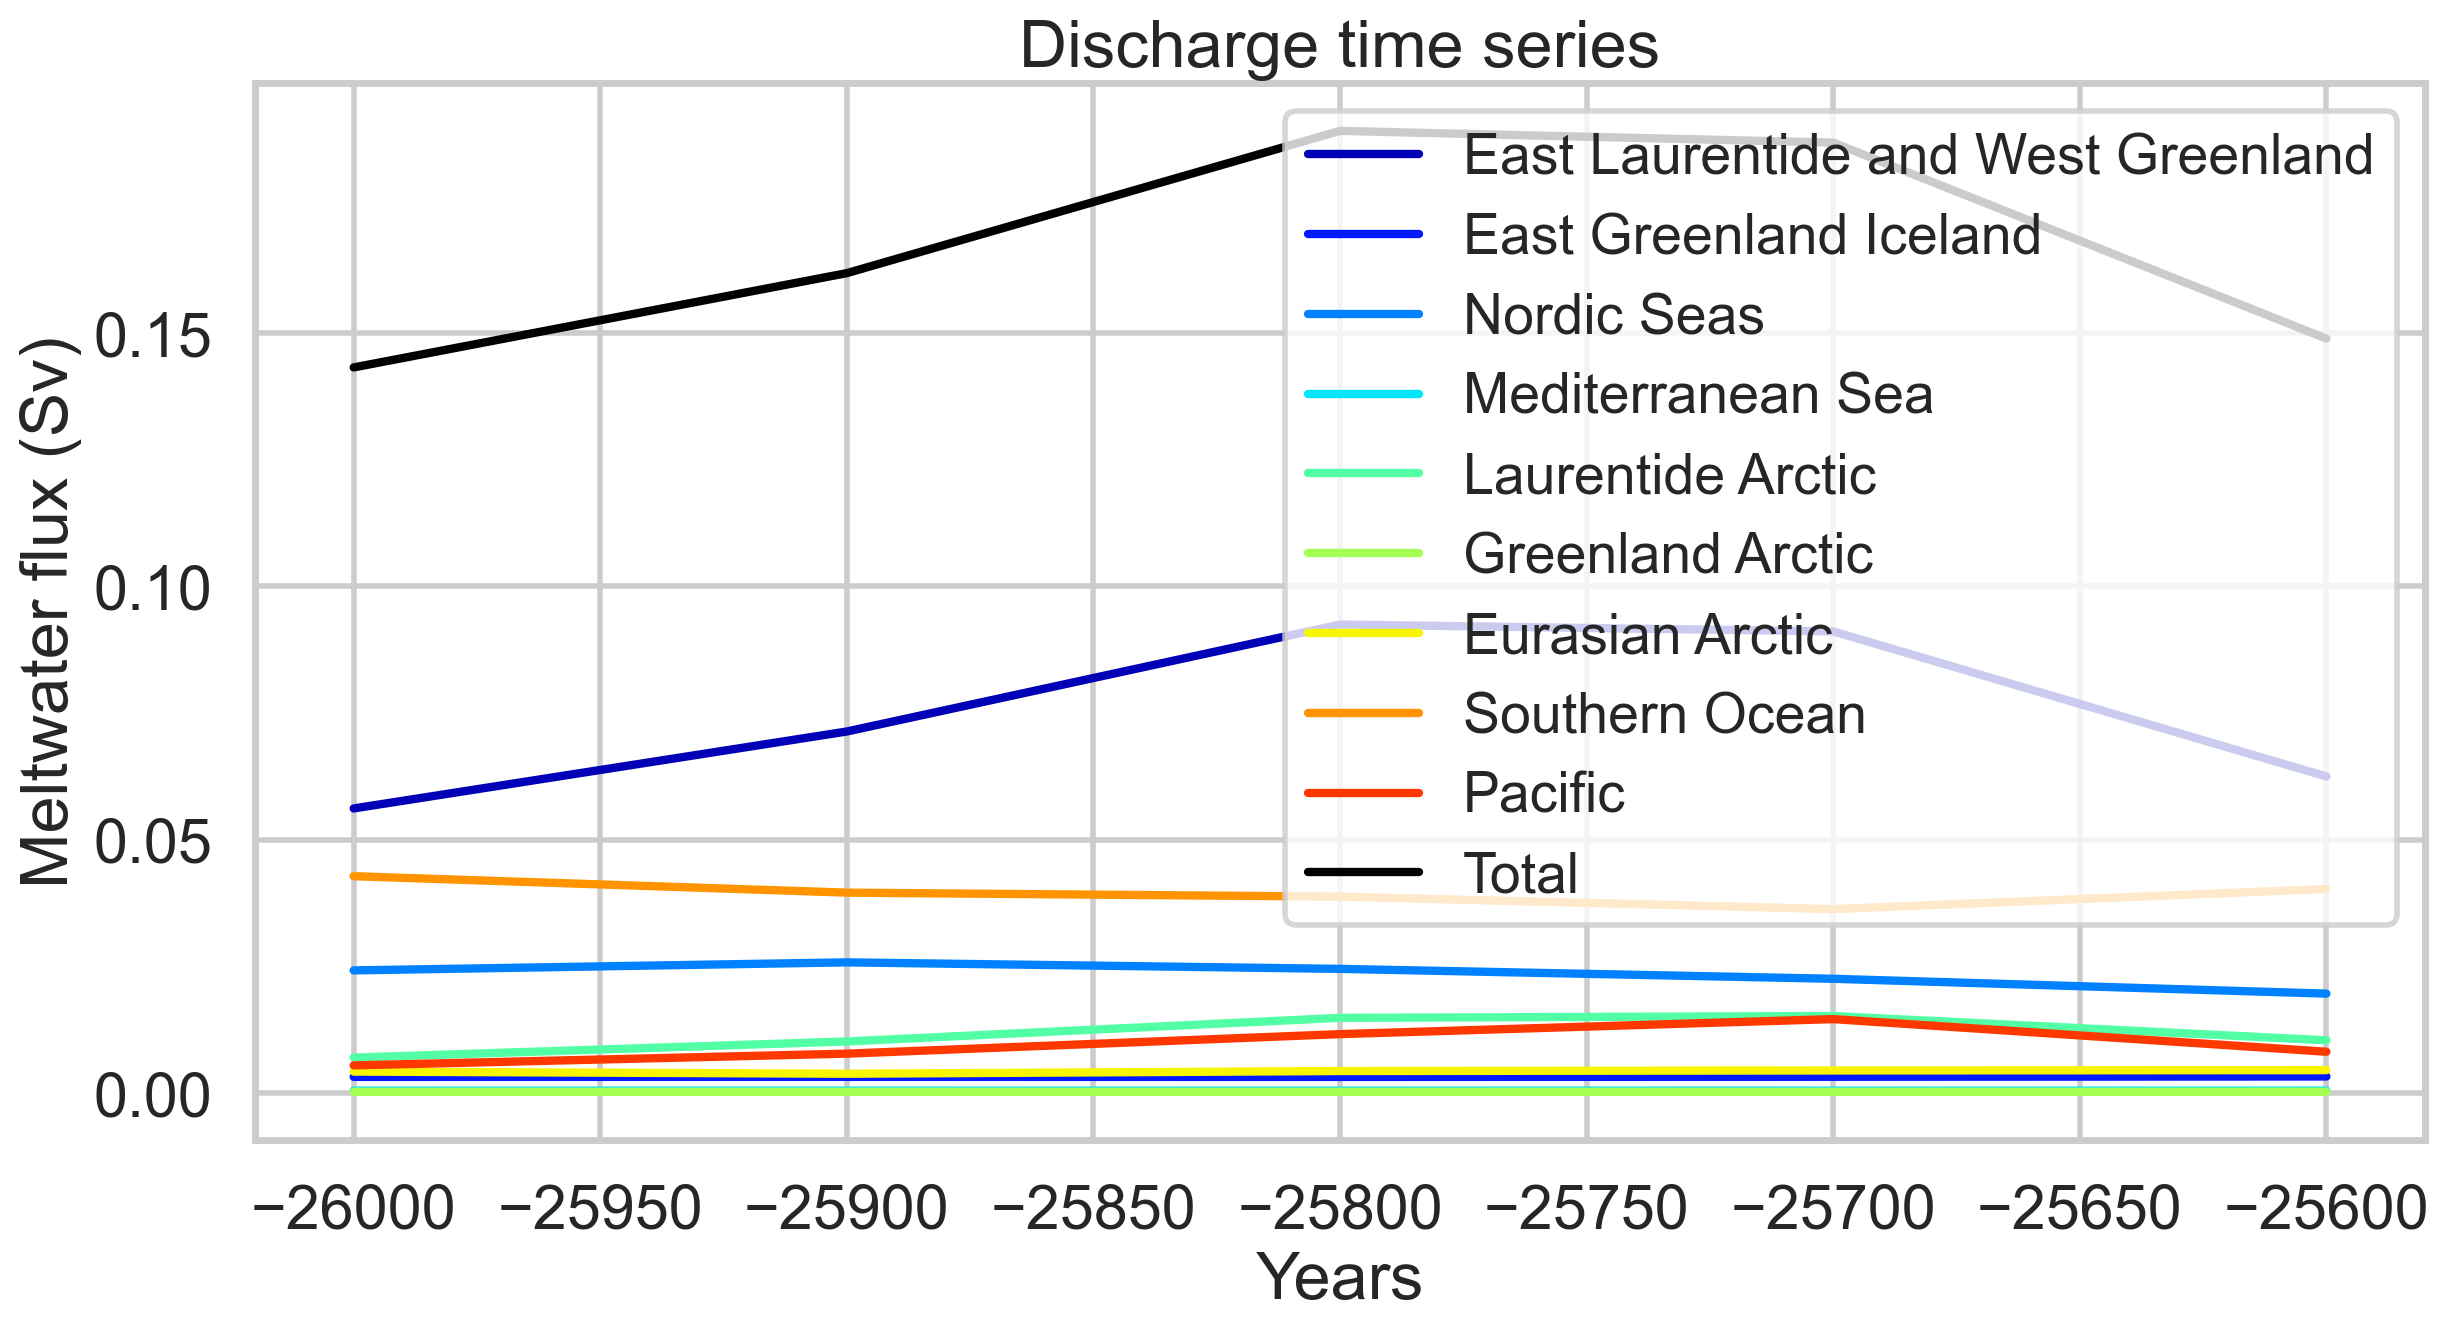

In [9]:
fluxes_final = plotting.create_discharge_ts(saving.ancil_to_discharge(ds_output), ds_lsm, details='medium')


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_spread.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_final))))
colors_region = {key: next(c_list) for key in fluxes_final.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_final:
    ax.plot(t, fluxes_final[flux].value, label=fluxes_final[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_title("Discharge time series")

In [10]:
# WRITING FINAL FILE

saving.create_output_directory(folder_name)

if file_name[-3:]==".nc":
    ds_output.to_netcdf(f"{folder_name}/{file_name}")
else:
    ds_output.to_netcdf(f"{folder_name}/{file_name}.nc")

____ Attempting to create a directory at  /nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj
____ Directory  /nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj  already exists.


## Debug final discharge

In [26]:
ds_script = xr.open_dataset("/nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj/xpfj.wfix.glac_transient.nc", decode_times=False)
ds_routed = xr.open_dataset("/nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj/routed_test.nc", decode_times=False)
ds_spread = xr.open_dataset("/nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj/spread_test.nc", decode_times=False)

ds_wfix = xr.open_dataset(f"{script_folder}/data/temev.qrparm.waterfix.nc", decode_times=False)
ds_lsm = xr.open_dataset(f"{script_folder}/data/temev.qrparm.omask.nc")

ds_script

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 288, t: 261)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600 ... -300 -200 -100 0
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * depth      (depth) float64 5.0
Data variables:
    discharge  (t, depth, latitude, longitude) float64 ...
Attributes:
    title:                Spread meltwater + waterfix mask for transient last...
    start_year:           -26000
    end_year:             0
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC_1D
    history:              Created on 14/12/2022 15:15:52 by Yvan Malo Romé

In [27]:
fluxes_script = plotting.create_discharge_ts(plotting.remove_waterfix(saving.ancil_to_discharge(ds_script), ds_wfix),
                                            ds_lsm, details='medium')

__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
____ Unmasking land-sea mask
____ Removing waterfix
__ Creating discharge time series


In [28]:
fluxes_routed = plotting.create_discharge_ts(ds_routed, ds_lsm, details='medium')

__ Creating discharge time series


In [29]:
fluxes_spread = plotting.create_discharge_ts(plotting.remove_waterfix(ds_spread, ds_wfix),
                                             ds_lsm, details='medium')

____ Removing waterfix
__ Creating discharge time series


In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_script.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_script))))
colors_region = {key: next(c_list) for key in fluxes_script.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_script:
    ax.plot(t, fluxes_script[flux].value, label=fluxes_script[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_title("Discharge time series")

Text(0.5, 1.0, 'Discharge time series')

Text(0.5, 1.0, 'Routed time series')

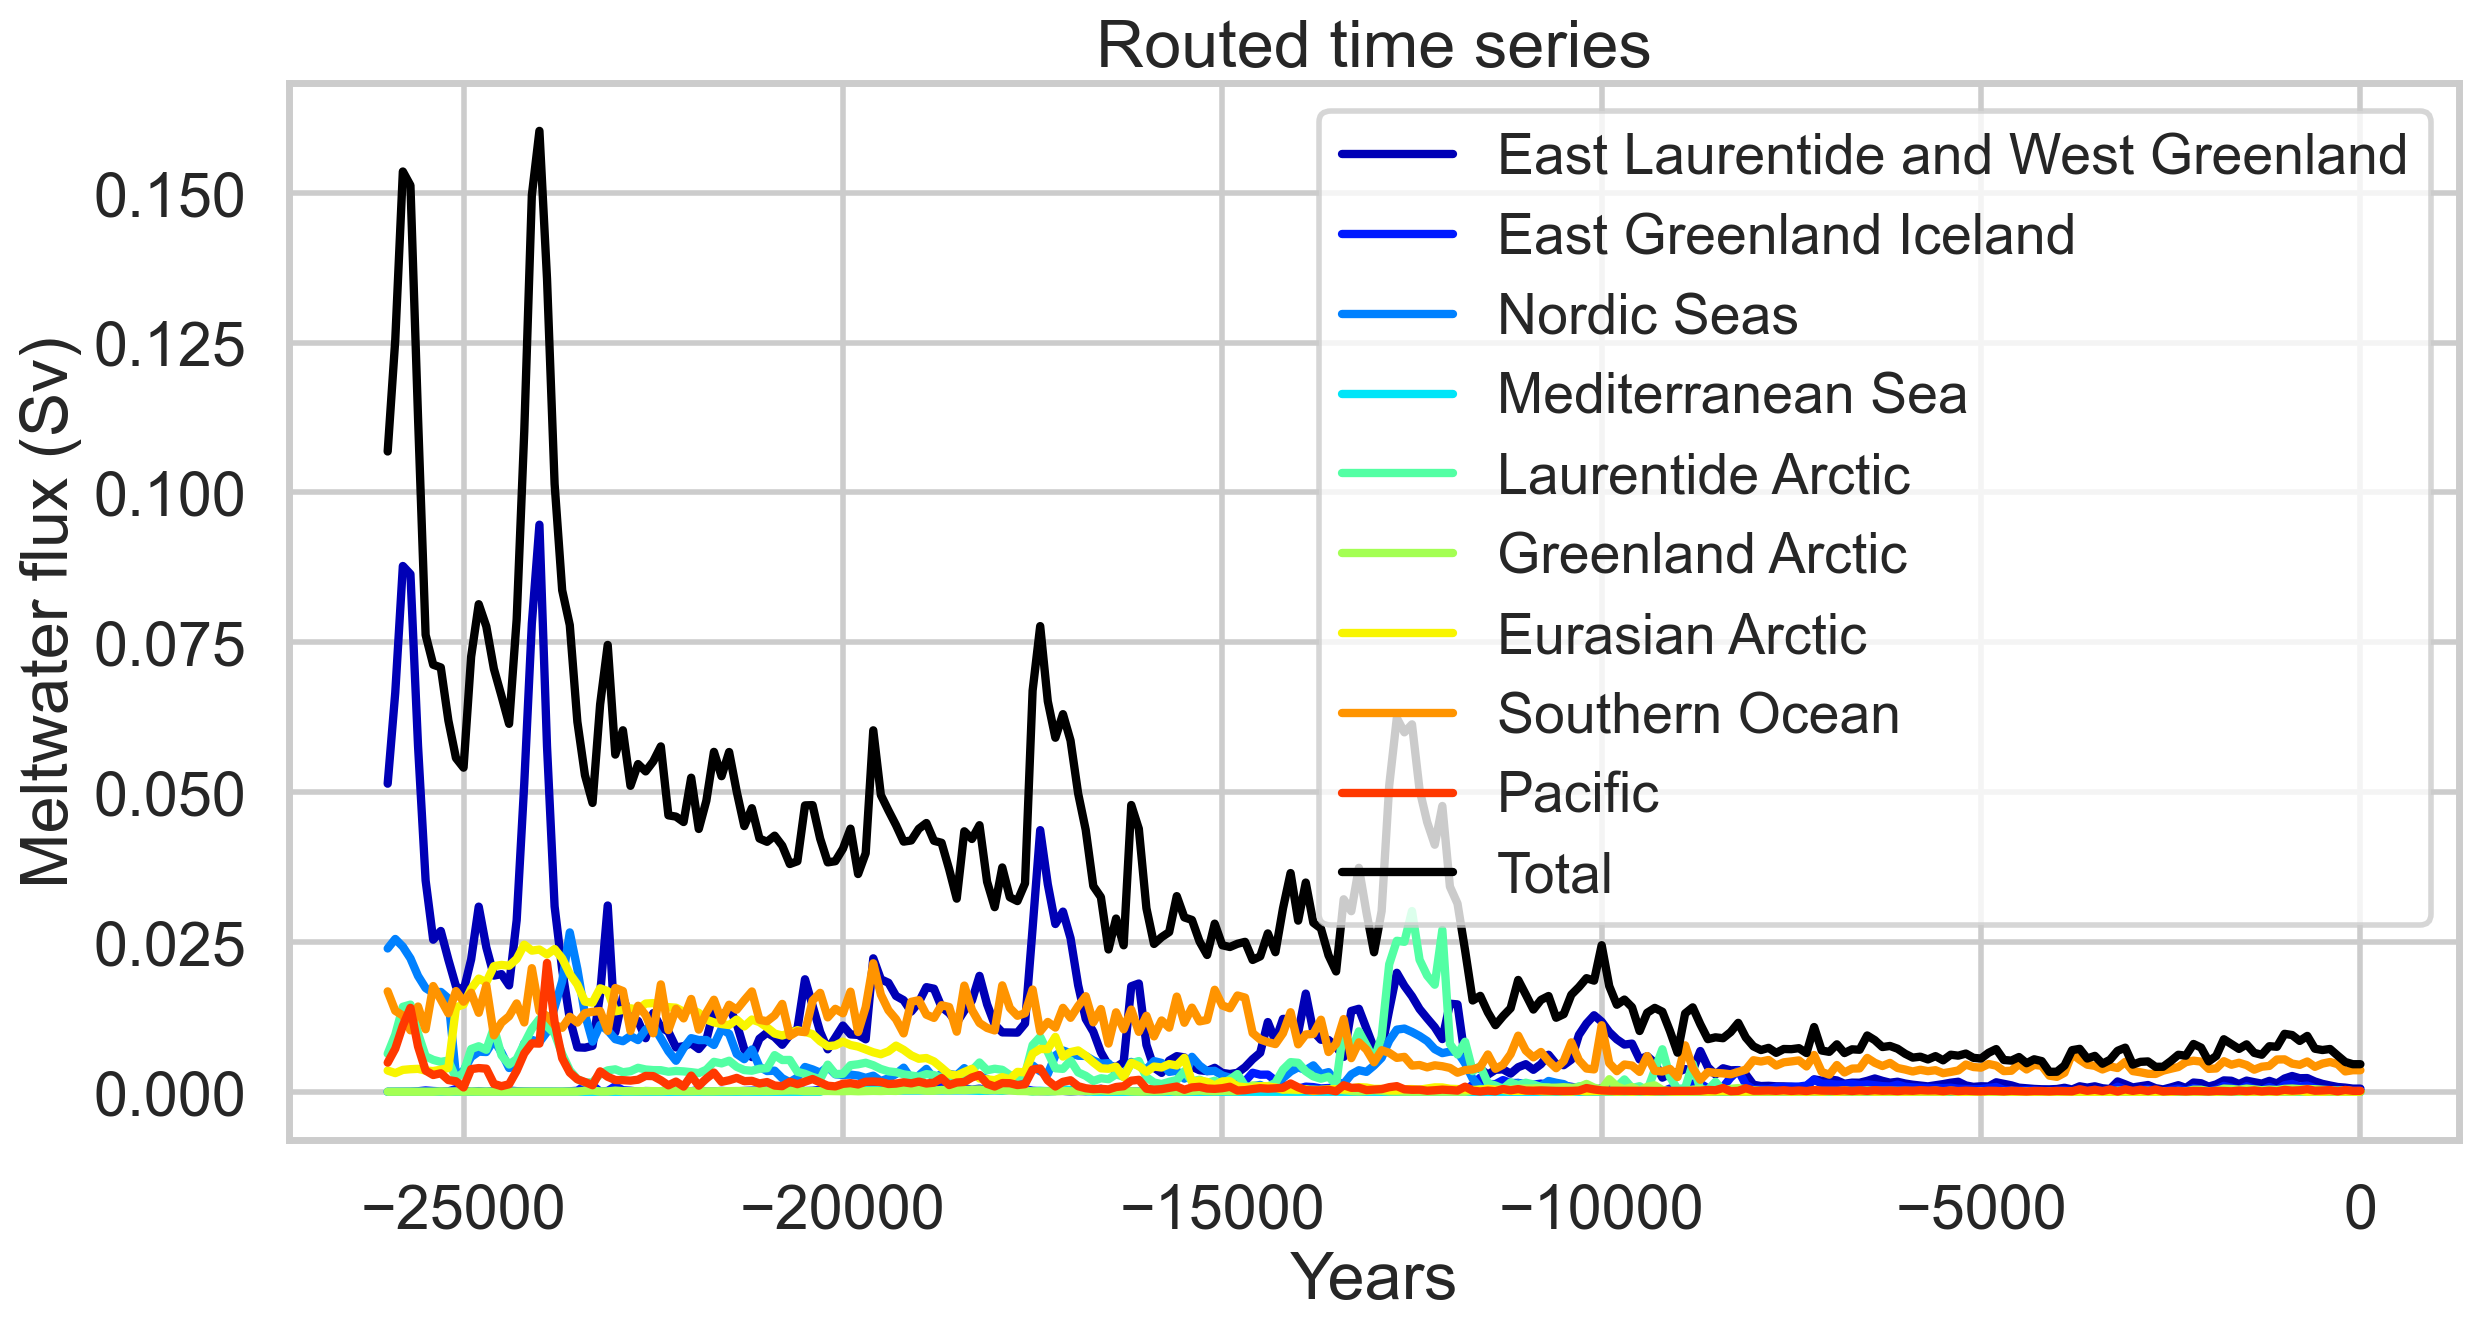

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_script.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_routed))))
colors_region = {key: next(c_list) for key in fluxes_routed.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_routed:
    ax.plot(t, fluxes_routed[flux].value, label=fluxes_routed[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_title("Routed time series")

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_script.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_spread))))
colors_region = {key: next(c_list) for key in fluxes_spread.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_spread:
    ax.plot(t, fluxes_spread[flux].value, label=fluxes_spread[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_title("Spread time series")

Text(0.5, 1.0, 'Spread time series')

In [33]:
ds_template = xr.open_dataset("/nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xoup/xoup.wfix.glac_ts.nc", decode_times=False)
ds_wfix = xr.open_dataset(f"{script_folder}/data/temev.qrparm.waterfix.nc", decode_times=False)
ds_lsm = xr.open_dataset(f"{script_folder}/data/temev.qrparm.omask.nc")

ds_template.attrs['waterfix'] = 'GLAC-1D'

ds_template

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 261)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600 ... -300 -200 -100 0
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 ...
Attributes:
    title:        Waterfix initially created for xoup HadCM3 experiment.- tem...
    start_year:   -26
    end_year:     0
    step:         100
    mode:         spreaded
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2021-01-13 13:22:38.162632 by Yvan Romé
    waterfix:     GLAC-1D

In [34]:
fluxes_template = plotting.create_discharge_ts(plotting.remove_waterfix(saving.ancil_to_discharge(ds_template), ds_wfix),
                                               ds_lsm, details='medium', rmean=1)

__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
__ No depth coordinate was found
____ Unmasking land-sea mask
____ Removing waterfix
__ Creating discharge time series


NameError: name 'fluxes_final' is not defined

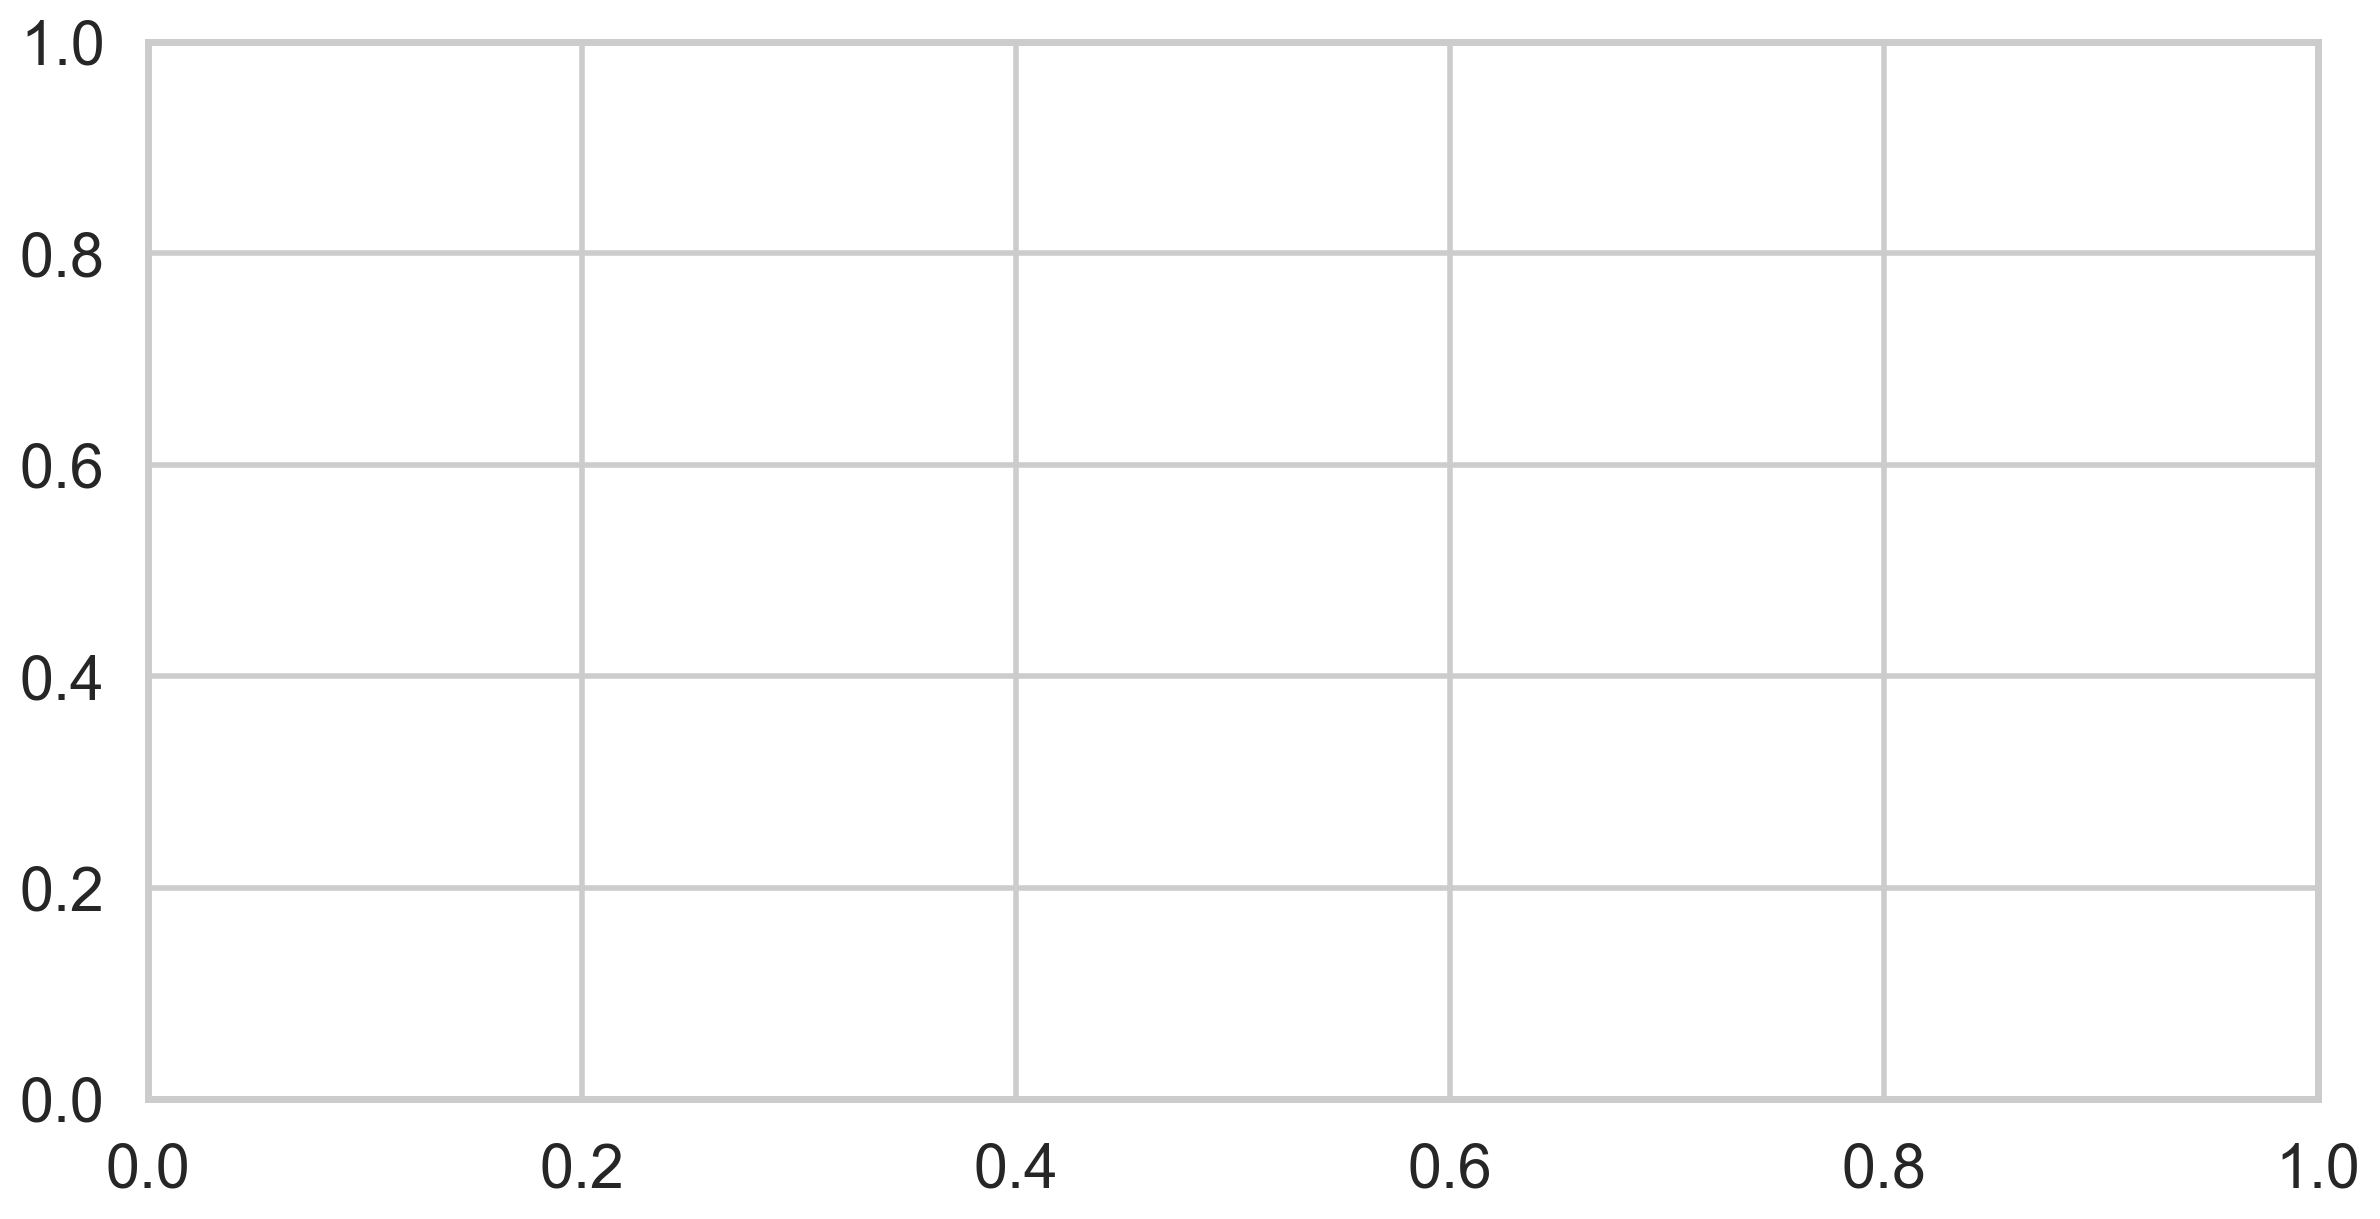

In [35]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_script.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_final))))
colors_region = {key: next(c_list) for key in fluxes_final.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_template:
    ax.plot(t, fluxes_template[flux].value, label=fluxes_template[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_title("Discharge time series")

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_script.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_final))))
colors_region = {key: next(c_list) for key in fluxes_final.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_final:
    ax.plot(t, fluxes_final[flux].value, label=fluxes_final[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_xlim([-26000,-12000])
ax.set_title("Discharge time series")

## Respread input files

In [49]:
# INPUT PARAMETERS

folder_name="/nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj"
file_name="xpfj.ice6g_glac_ts.shift.nc"

waterfix='GLAC-1D'
flux_unit='m3/s'

start_year = None
end_year = None
time_step = None

In [51]:
# INPUTS DATASET

# ds_final = xr.open_dataset(f"{folder_name}/xpfj.wfix.glac_test.nc", decode_times=False)
ds_ini = xr.open_dataset(f"/nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj/xpfj.wfix.ice6g_ts.shift.nc", decode_times=False).sel(t=slice(start_year,end_year))
ds_spread_ini = saving.ancil_to_discharge(ds_ini)

ds_lsm_ini = xr.open_dataset(f"{script_folder}/data/ice6g.omask.nc")  # ICE6G
ds_lsm_fnl = xr.open_dataset(f"{script_folder}/data/temev.qrparm.omask.nc")  # GLAC-1D

ds_wfix_ini = xr.open_dataset(f"{script_folder}/data/teadv3.qrparm.waterfix.nc").rename({'unspecified':'depth'})  # ICE6G
ds_wfix_fnl = xr.open_dataset(f"{script_folder}/data/temev.qrparm.waterfix.nc")  # GLAC-1D

__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
__ No depth coordinate was found
____ Unmasking land-sea mask


In [52]:
# RESPREADING ALGORITHM

ds_spread_fnl = spreading.respreading(ds_spread_ini, ds_lsm_ini, ds_wfix_ini, ds_lsm_fnl, ds_wfix_fnl,
                                      discharge_unit=flux_unit, waterfix=waterfix)
ds_spread_fnl

__ Respreading algorithm
____ Spreading in US_East_Coast
____ Spreading in Greenland_Arctic
____ Spreading in N_American_Arctic
____ Spreading in Gulf_of_Mexico
____ Spreading in East_Pacific
____ Spreading in Russia_Pacific
____ Spreading in LabradorSea_BaffinBay
____ Spreading in Atlantic_GreenlandIceland
____ Spreading in EastGreenland_Iceland
____ Spreading in EastIceland
____ Spreading in UK_Atlantic
____ Spreading in Eurasian_GINSeas
____ Spreading in South_Iceland
____ Spreading in Eurasian_Arctic
____ Spreading in Siberian_Arctic
____ Spreading in Mediterranean
____ Spreading in Patagonia_Atlantic
____ Spreading in Patagonia_Pacific
____ Spreading in NorthNewZealand_Pacific
____ Spreading in SouthNewZealand_Pacific
____ Spreading in Antarctica_RossSea
____ Spreading in Antarctica_AmundsenSea
____ Spreading in Antarctica_WeddellSea
____ Spreading in Antarctica_RiiserLarsonSea
____ Spreading in Antarctica_DavisSea

Spreading of water didn't work.

Checking the mean flux (from m3/

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 61)
Coordinates:
  * t          (t) float32 7.2e+04 7.25e+04 7.3e+04 ... 1.015e+05 1.02e+05
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:       RESPREAD MELTWATER DISCHARGE
    start_year:  -28
    end_year:    2
    step:        500
    lsm:         None
    history:     Created 2022-12-19 12:12:46.392436 by Yvan Romé
    waterfix:    GLAC-1D

In [53]:
# SAVING ALGORITHM

ds_output = saving.multiply_steps(saving.crop_years(saving.discharge_to_ancil(ds_spread_fnl, ds_lsm_fnl), start_year, end_year), time_step)
ds_output

__ Converting discharge to ancil
____ Converting m3/s to kg/m2/s
____ Adding depth coordinate
____ Masking land-sea mask
____ Cropping years
____ Multiplying time steps


<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 288, t: 61)
Coordinates:
  * t          (t) float32 7.2e+04 7.25e+04 7.3e+04 ... 1.015e+05 1.02e+05
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * depth      (depth) float64 5.0
Data variables:
    discharge  (t, depth, latitude, longitude) float64 nan nan nan ... nan nan
Attributes:
    title:       Spread meltwater + waterfix mask for transient last delgacia...
    start_year:  72000.0
    end_year:    102000.0
    step:        500
    lsm:         GLAC-1D_21k
    history:     Created on 19/12/2022 12:12:50 by Yvan Malo Romé
    waterfix:    GLAC-1D

In [17]:
# WRITING FINAL FILE

saving.create_output_directory(folder_name)

if file_name[-3:]==".nc":
    ds_output.to_netcdf(f"{folder_name}/{file_name}")
else:
    ds_output.to_netcdf(f"{folder_name}/{file_name}.nc")

____ Attempting to create a directory at  /nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj
____ Directory  /nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj  already exists.


**Algorithm check**

In [60]:
# ds_template = xr.open_dataset("/nfs/see-fs-01_users/eeymr/work/outputs/mw_protocol/xpfj/xpfj.wfix.ice6g_ts.shift.nc", decode_times=False)
# ds_wfix = xr.open_dataset(f"{script_folder}/data/temev.qrparm.waterfix.nc", decode_times=False)
# ds_lsm = xr.open_dataset(f"{script_folder}/data/temev.qrparm.omask.nc")

ds_template = ds_ini.copy()

ds_template.attrs['waterfix'] = 'GLAC-1D'

ds_template

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 61)
Coordinates:
  * t          (t) float32 7.2e+04 7.25e+04 7.3e+04 ... 1.015e+05 1.02e+05
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float32 ...
Attributes:
    title:       ICE-6G FLUX CORRECTION WITH PI WATERFIX
    start_year:  -28
    end_year:    2
    step:        500
    lsm:         teadv3
    history:     Created 2021-08-04 14:36:24.315291 by Yvan Romé
    waterfix:    GLAC-1D

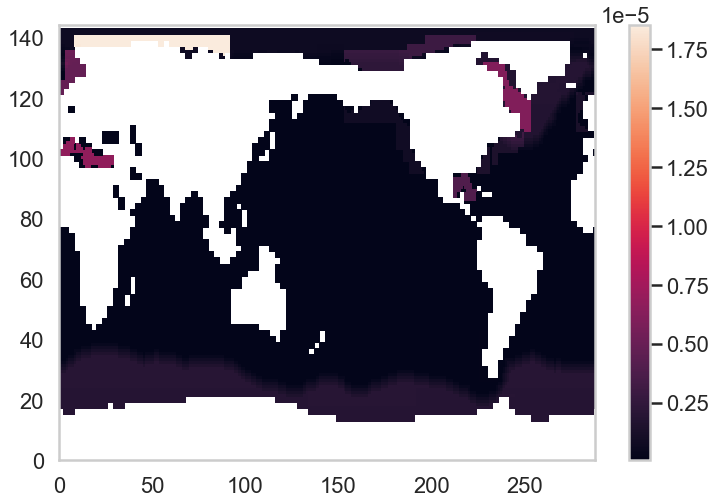

In [54]:
plt.pcolormesh(ds_output.discharge.isel(depth=0).isel(t=0))
plt.colorbar()

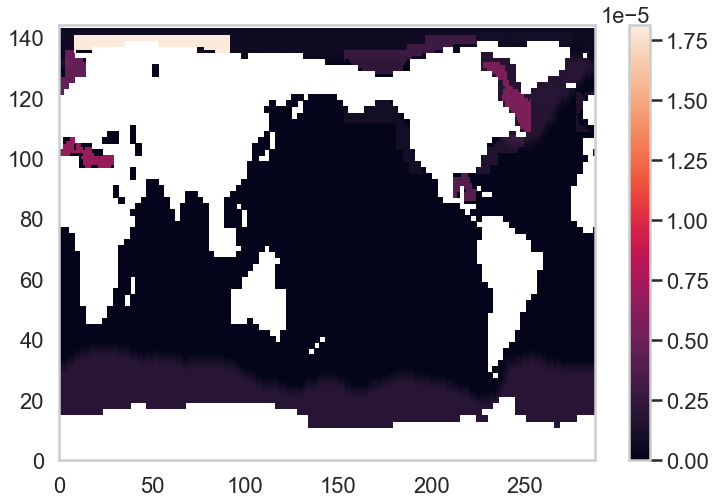

In [70]:
plt.pcolormesh(ds_template.discharge.isel(t=0))
plt.colorbar()

In [57]:
fluxes_respread = plotting.create_discharge_ts(plotting.remove_waterfix(saving.ancil_to_discharge(ds_output), ds_wfix_fnl), ds_lsm_fnl, details='medium')

__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
____ Unmasking land-sea mask
____ Removing waterfix
__ Creating discharge time series


Text(0.5, 1.0, 'Discharge time series')

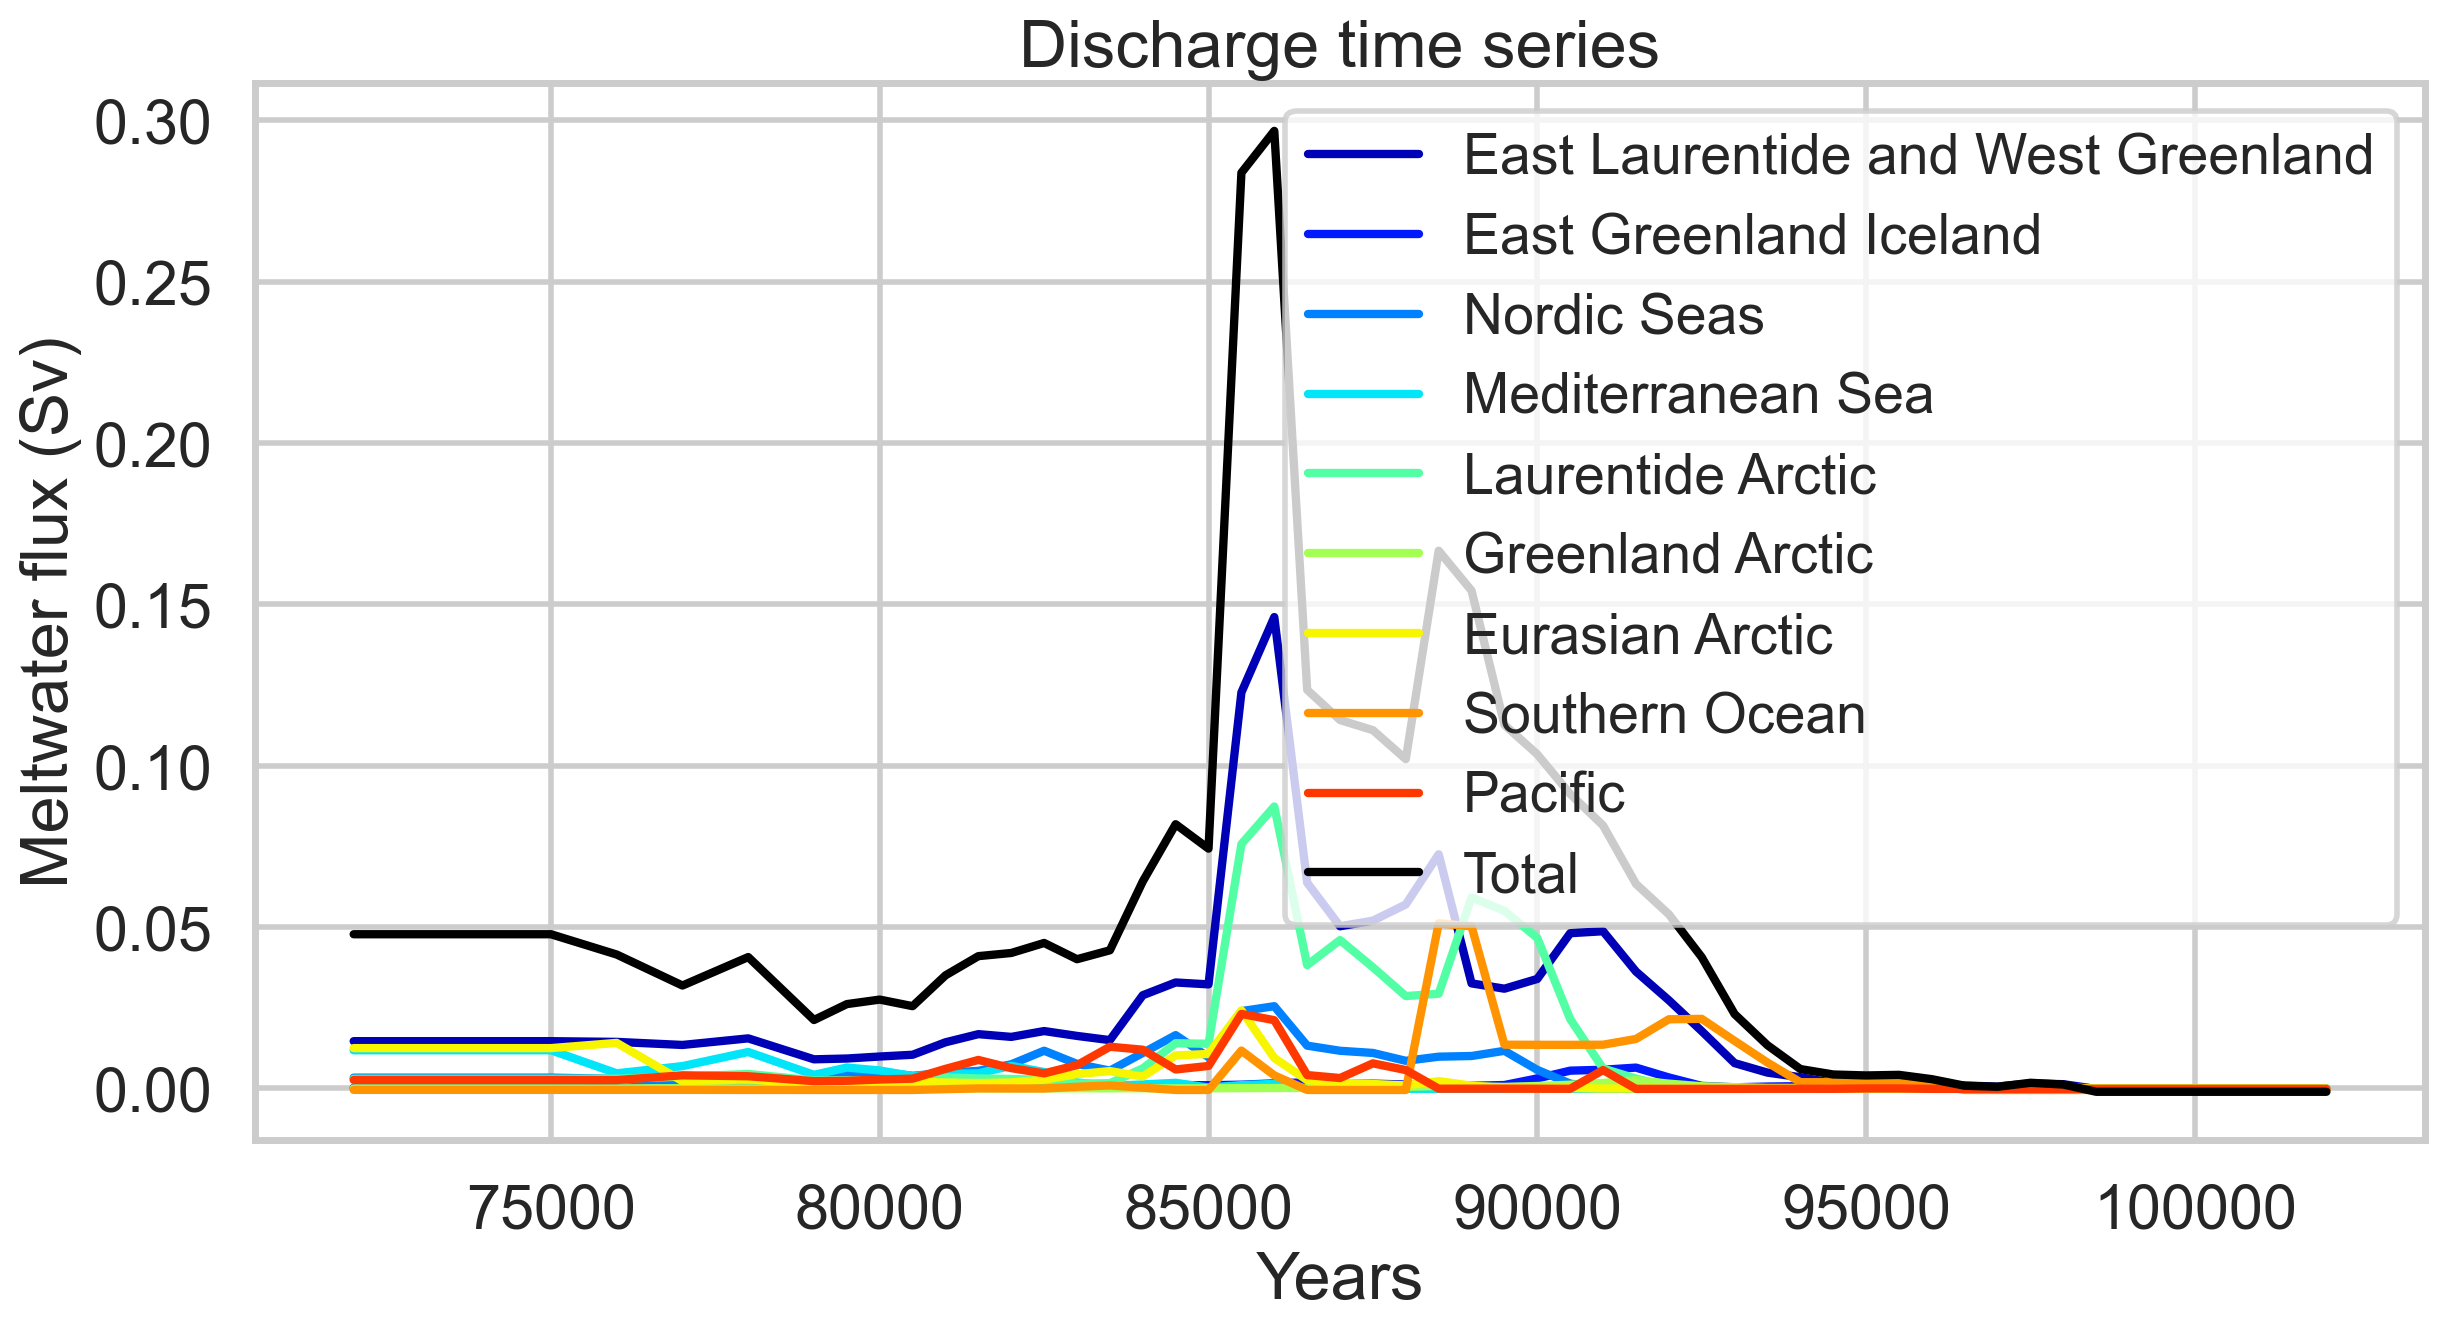

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_output.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_respread))))
colors_region = {key: next(c_list) for key in fluxes_respread.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_respread:
    ax.plot(t, fluxes_respread[flux].value, label=fluxes_respread[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_title("Discharge time series")

In [61]:
fluxes_template = plotting.create_discharge_ts(plotting.remove_waterfix(saving.ancil_to_discharge(ds_template), ds_wfix_ini),
                                               ds_lsm_ini, details='medium', rmean=1)

__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
__ No depth coordinate was found
____ Unmasking land-sea mask
____ Removing waterfix
__ Creating discharge time series


In [63]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_template.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_template))))
colors_region = {key: next(c_list) for key in fluxes_template.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_template:
    ax.plot(t, fluxes_template[flux].value, label=fluxes_template[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_title("Template time series")

Text(0.5, 1.0, 'Template time series')

Text(0.5, 1.0, 'Template time series')

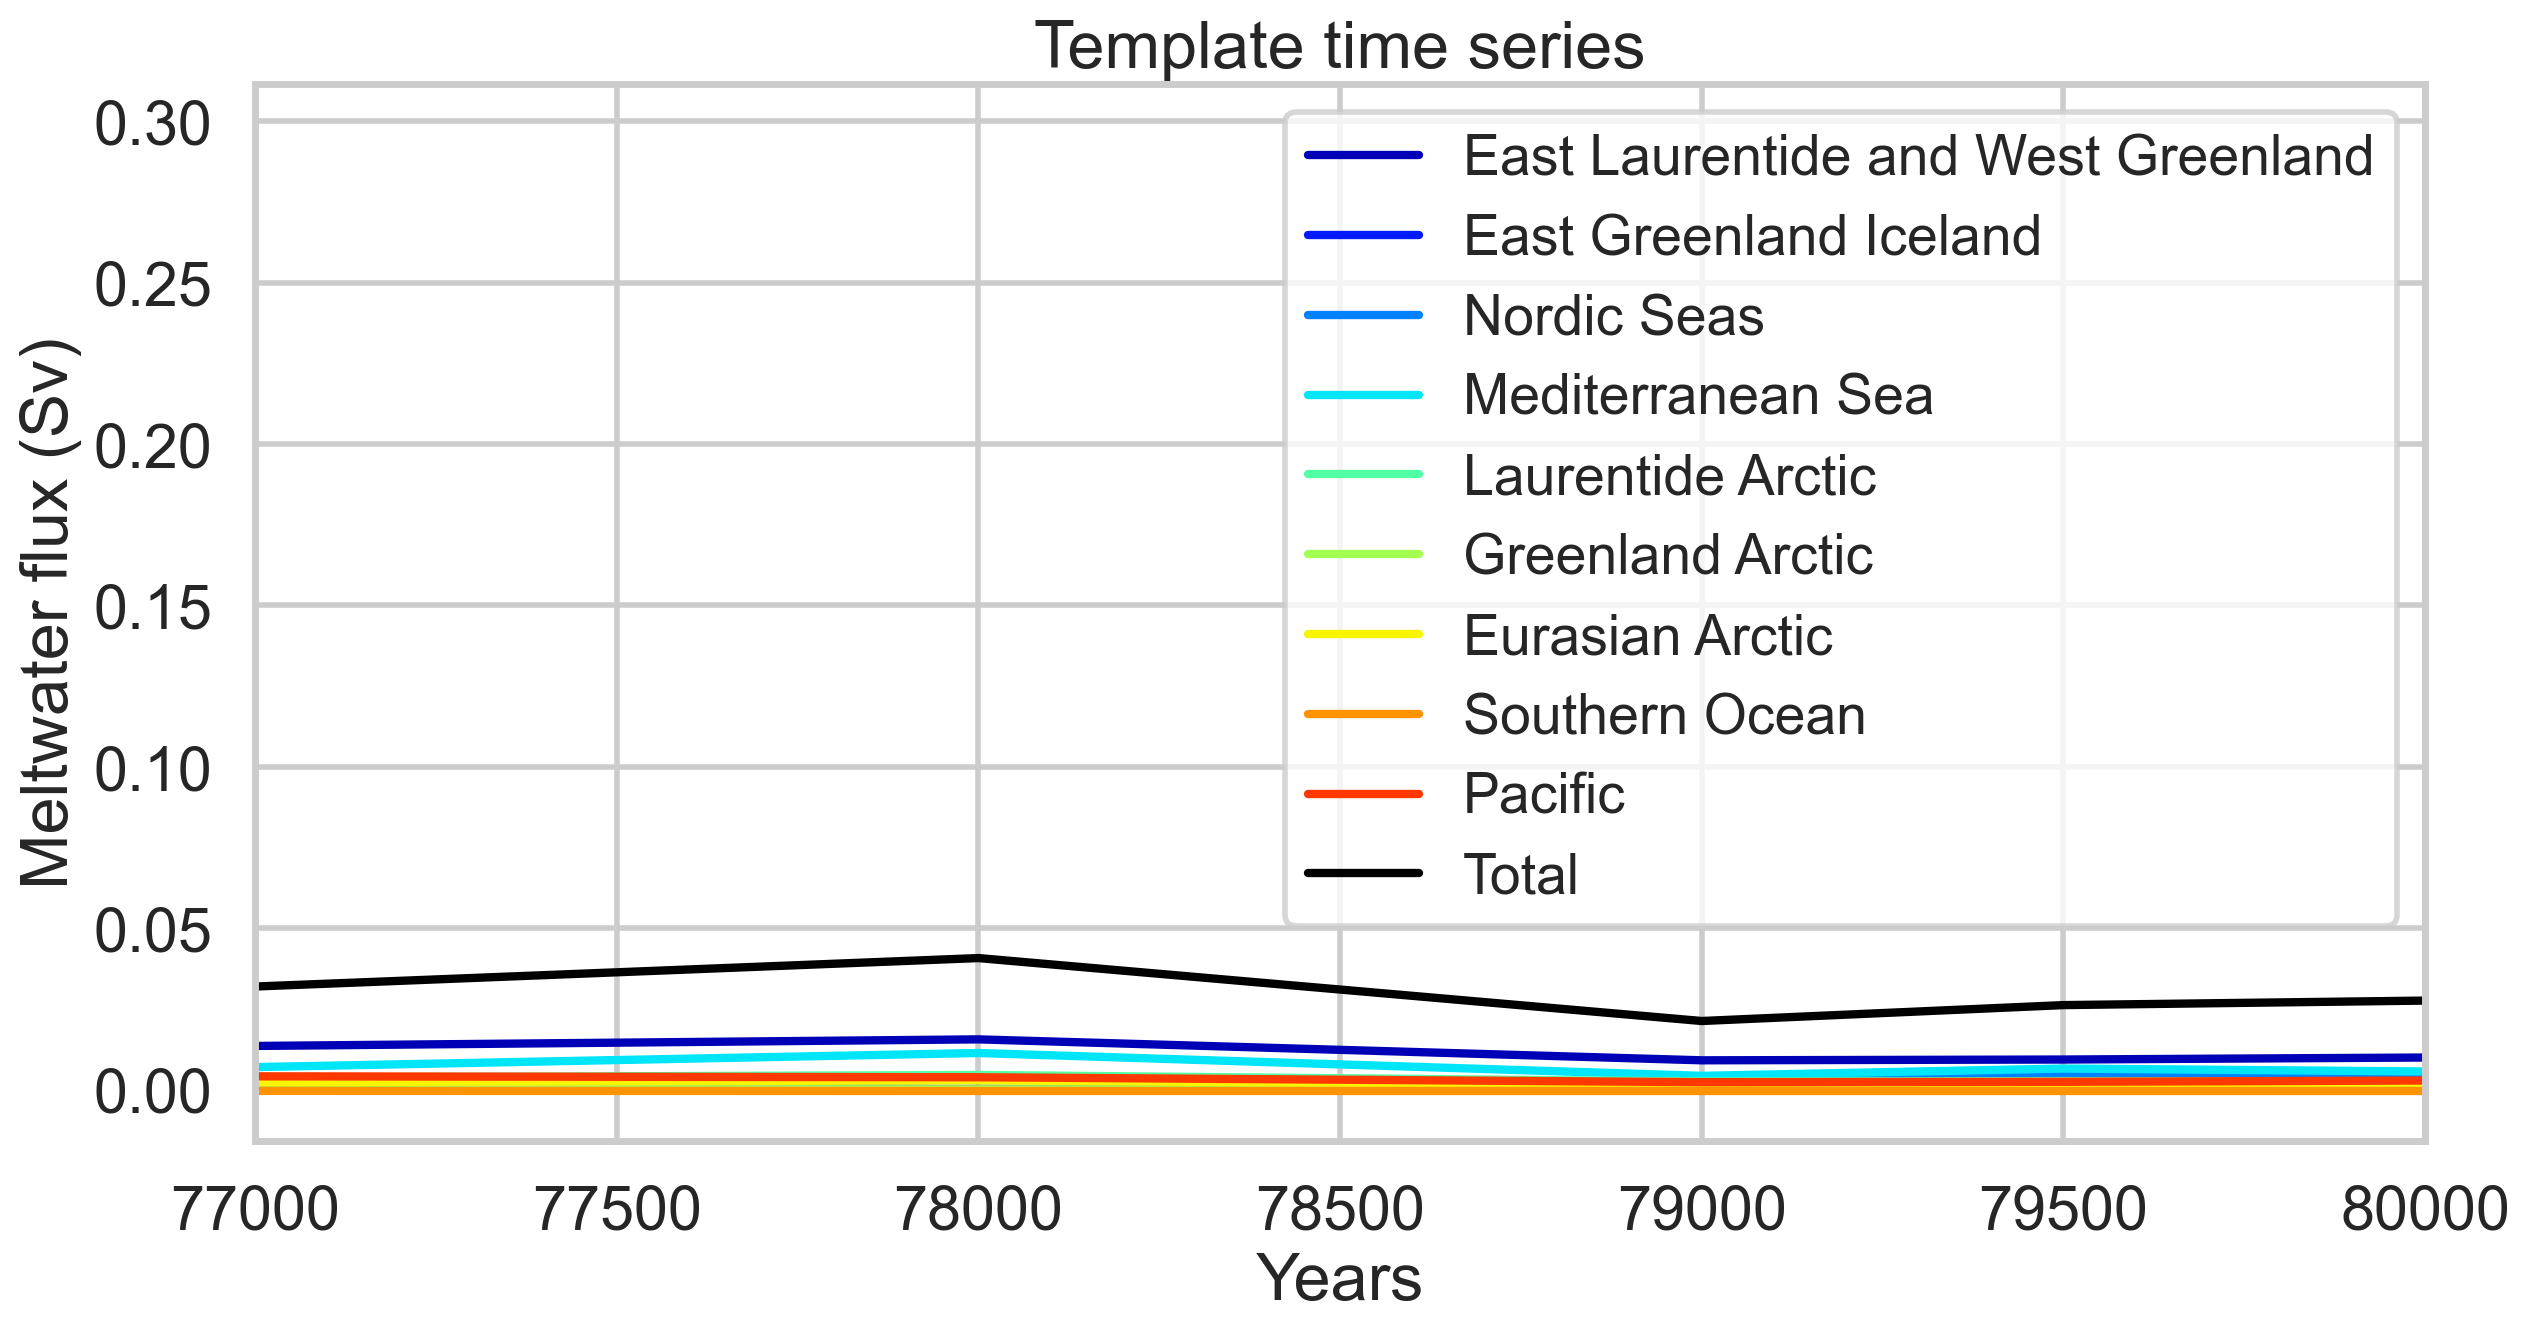

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_template.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_template))))
colors_region = {key: next(c_list) for key in fluxes_template.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_template:
    ax.plot(t, fluxes_template[flux].value, label=fluxes_template[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_xlim([77000, 80000])
ax.set_title("Template time series")

Text(0.5, 1.0, 'Discharge time series anomalies')

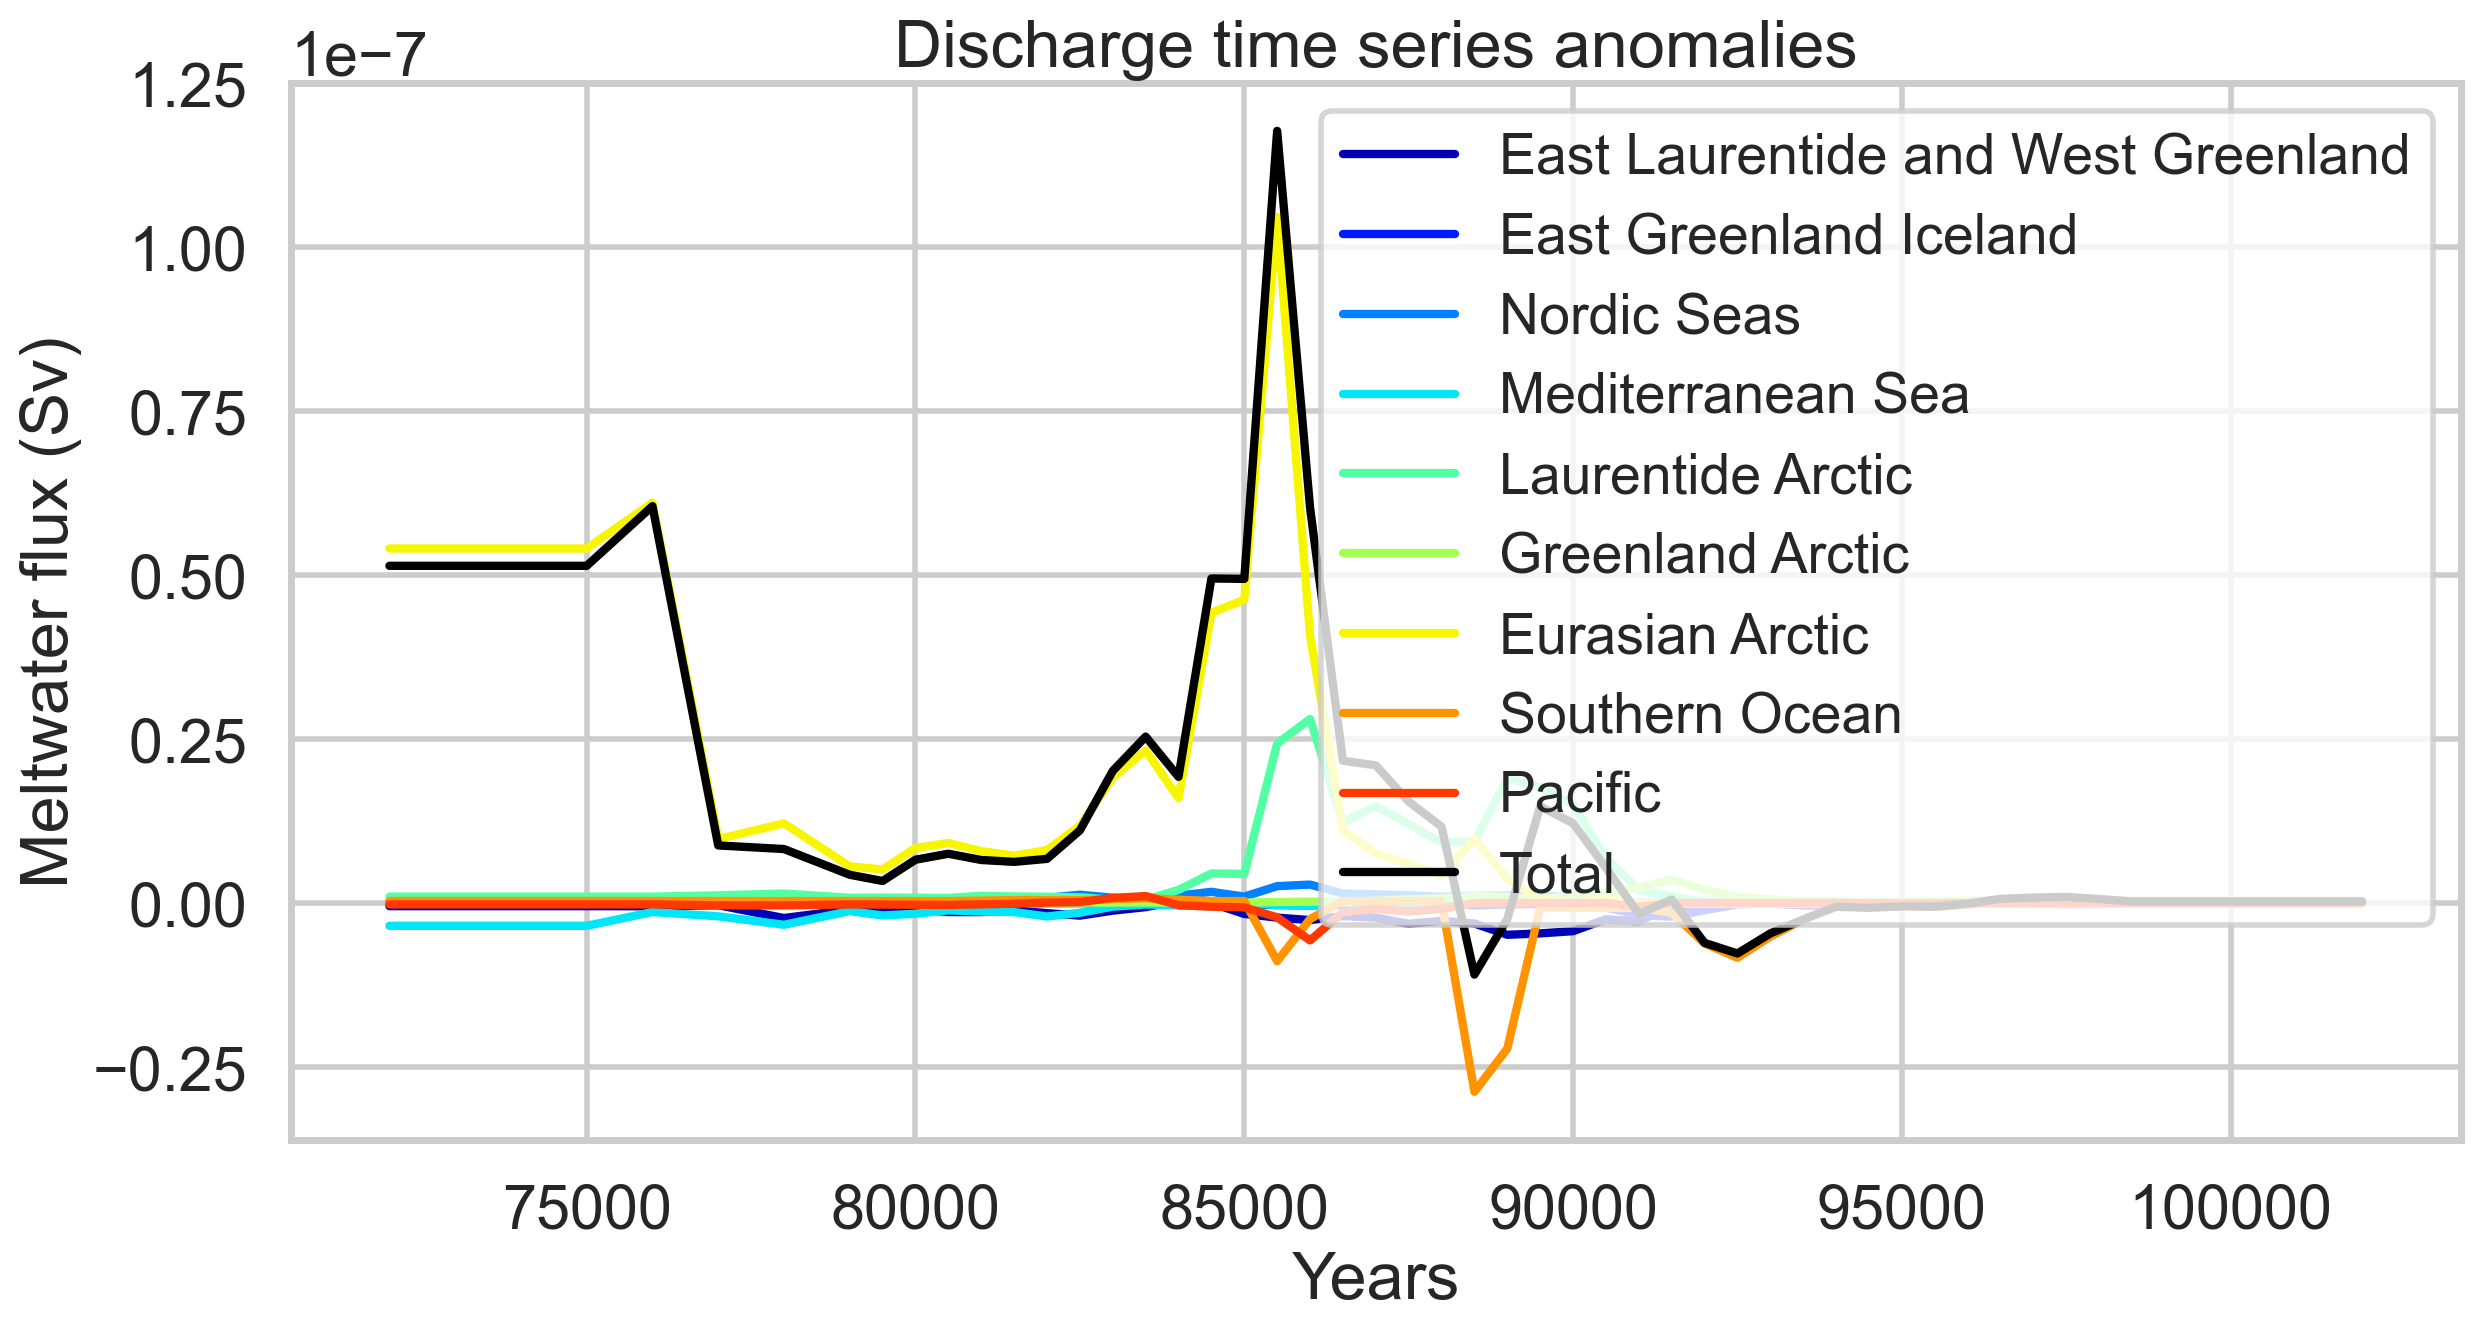

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 7), dpi=200)

t = ds_template.t.values

c_list = iter(plt.cm.jet(np.linspace(0.05, 0.95, len(fluxes_template))))
colors_region = {key: next(c_list) for key in fluxes_template.keys()}
colors_region['tot'] = 'black'

for flux in fluxes_template:
    ax.plot(t, fluxes_template[flux].value-fluxes_respread[flux].value, label=fluxes_template[flux].name, color=colors_region[flux], linestyle="-")

ax.legend(loc="upper right", fontsize='small')

ax.set_ylabel("Meltwater flux (Sv)")
ax.ticklabel_format(style="sci")
ax.set_xlabel("Years")
ax.set_title("Discharge time series anomalies")

In [85]:
test_output = plotting.remove_waterfix(saving.ancil_to_discharge(ds_output), ds_wfix_fnl)
test_template = plotting.remove_waterfix(saving.ancil_to_discharge(ds_template), ds_wfix_ini)

__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
____ Unmasking land-sea mask
____ Removing waterfix
__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
__ No depth coordinate was found
____ Unmasking land-sea mask
____ Removing waterfix


In [90]:
i=40
plt.pcolormesh(tb.ntn(test_output.discharge.isel(t=i) - test_template.discharge.isel(t=i)))
plt.colorbar()

In [78]:
flux_output = plotting.remove_waterfix(saving.ancil_to_discharge(ds_output), ds_wfix_fnl).discharge.sum(dim=('longitude', 'latitude'))*10**(-6)
flux_output

__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
____ Unmasking land-sea mask
____ Removing waterfix


<xarray.DataArray 'discharge' (t: 61)>
array([ 0.04775848,  0.04775848,  0.04775848,  0.04775848,  0.04775848,
        0.04775848,  0.04775848,  0.04461533,  0.04147218,  0.03667317,
        0.03187415,  0.03628186,  0.04068958,  0.03093946,  0.02118933,
        0.02611337,  0.02751192,  0.02547392,  0.03502695,  0.04097931,
        0.04195808,  0.04505613,  0.04002123,  0.04278231,  0.06686772,
        0.08312981,  0.07487138,  0.28724148,  0.29664712,  0.12346952,
        0.11411824,  0.11098164,  0.10199841,  0.16657324,  0.15420133,
        0.11262749,  0.10349486,  0.09120265,  0.08144569,  0.0633546 ,
        0.05394328,  0.04065025,  0.02302647,  0.01337728,  0.0059908 ,
        0.0043082 ,  0.00400942,  0.0041914 ,  0.00285588,  0.0008207 ,
        0.00049994,  0.0017384 ,  0.00119296, -0.00105368, -0.00105368,
       -0.00105368, -0.00105368, -0.00105368, -0.00105368, -0.00105368,
       -0.00105368])
Coordinates:
  * t        (t) float32 7.2e+04 7.25e+04 7.3e+04 ... 1.015e+05 1.02e+05

In [79]:
flux_template = plotting.remove_waterfix(saving.ancil_to_discharge(ds_template), ds_wfix_ini).discharge.sum(dim=('longitude', 'latitude'))*10**(-6)

__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
__ No depth coordinate was found
____ Unmasking land-sea mask
____ Removing waterfix


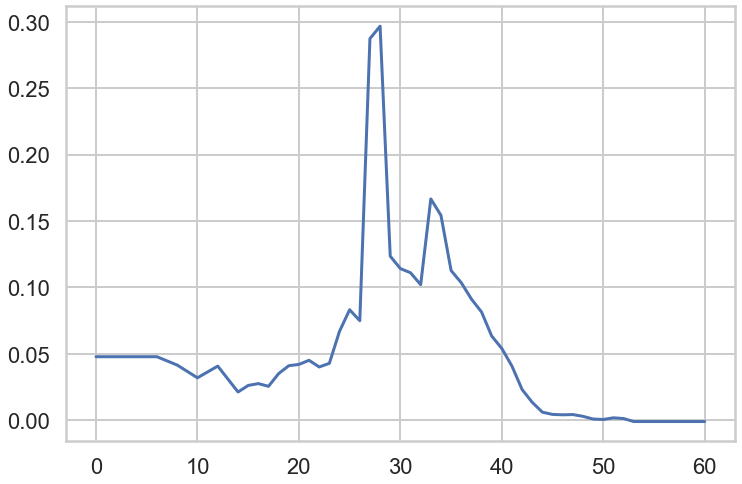

In [80]:
plt.plot(flux_output)

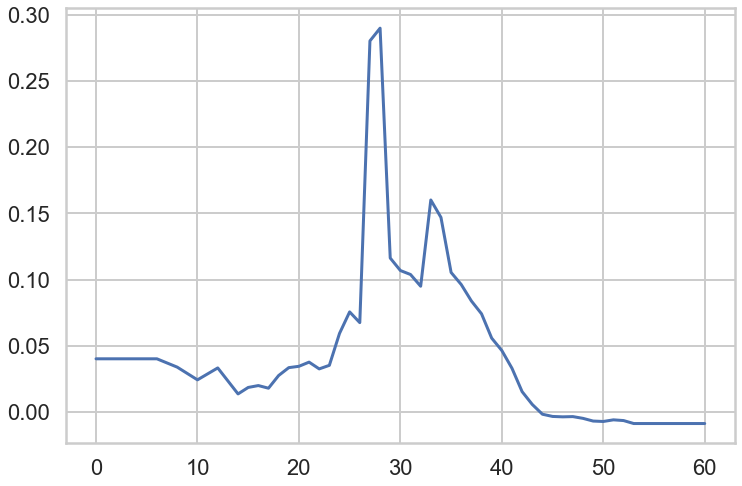

In [81]:
plt.plot(flux_template)

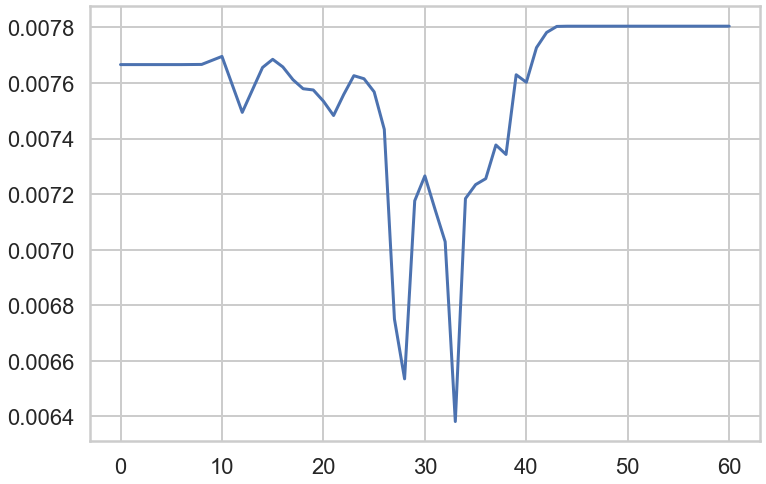

In [82]:
plt.plot(flux_output - flux_template)

## LGM meltwater snapshots simulations

In [41]:
ds_lgm = xr.open_dataset("/nfs/annie/eeymr/work/outputs/mw_protocol/xoup/xoup.wfix.lgm.nc")
ds_lgm

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 357.5 358.8 360.0 361.2
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Data variables:
    field672   (t, depth, latitude, longitude) float32 ...
Attributes:
    history:  Created on 2020-11-24 17:12:35.607907 by Yvan Romé
    title:    Waterfix for HadCM3 simulations [GLAC-1D] - Created using value...

In [42]:
ds_lgm1 = xr.open_dataset("/nfs/annie/eeymr/work/outputs/mw_protocol/xoup/xoup.wfix.lgm1.nc")
ds_lgm1

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 357.5 358.8 360.0 361.2
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Data variables:
    field672   (t, depth, latitude, longitude) float32 ...
Attributes:
    history:  Created on 2021-01-18 17:37:25.544285 by Yvan Romé
    title:    Waterfix for HadCM3 simulations [GLAC-1D] - Created using value...

In [43]:
ds_lgm2 = xr.open_dataset("/nfs/annie/eeymr/work/outputs/mw_protocol/xoup/xoup.wfix.lgm2.nc")
ds_lgm2

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 357.5 358.8 360.0 361.2
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Data variables:
    field672   (t, depth, latitude, longitude) float32 ...
Attributes:
    history:  Created on 2021-01-18 17:50:01.340472 by Yvan Romé
    title:    Waterfix for HadCM3 simulations [GLAC-1D] - Created using value...

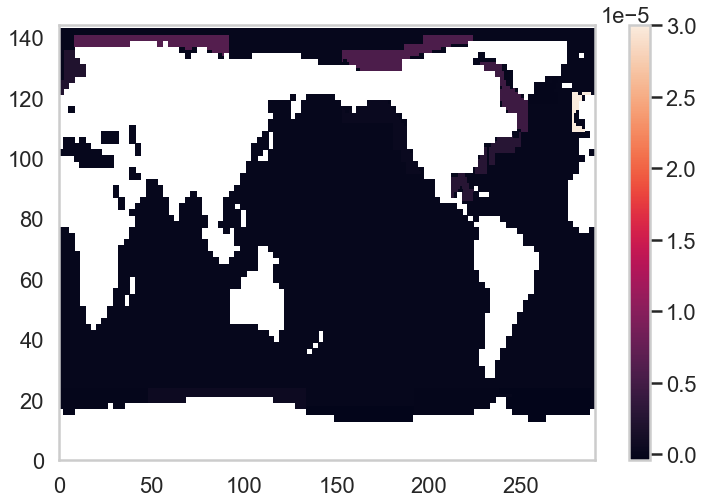

In [47]:
plt.pcolormesh(ds_lgm2.field672.isel(t=0).isel(depth=0) - ds_lgm.field672.isel(t=0).isel(depth=0))
plt.colorbar()

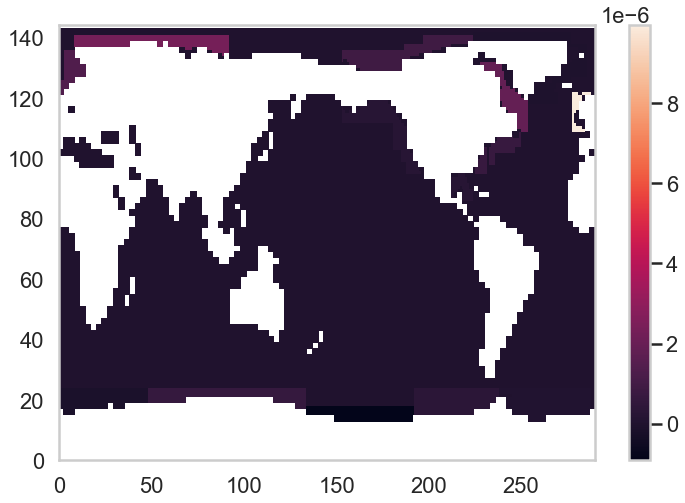

In [48]:
plt.pcolormesh(ds_lgm1.field672.isel(t=0).isel(depth=0) - ds_lgm.field672.isel(t=0).isel(depth=0))
plt.colorbar()

### Main method

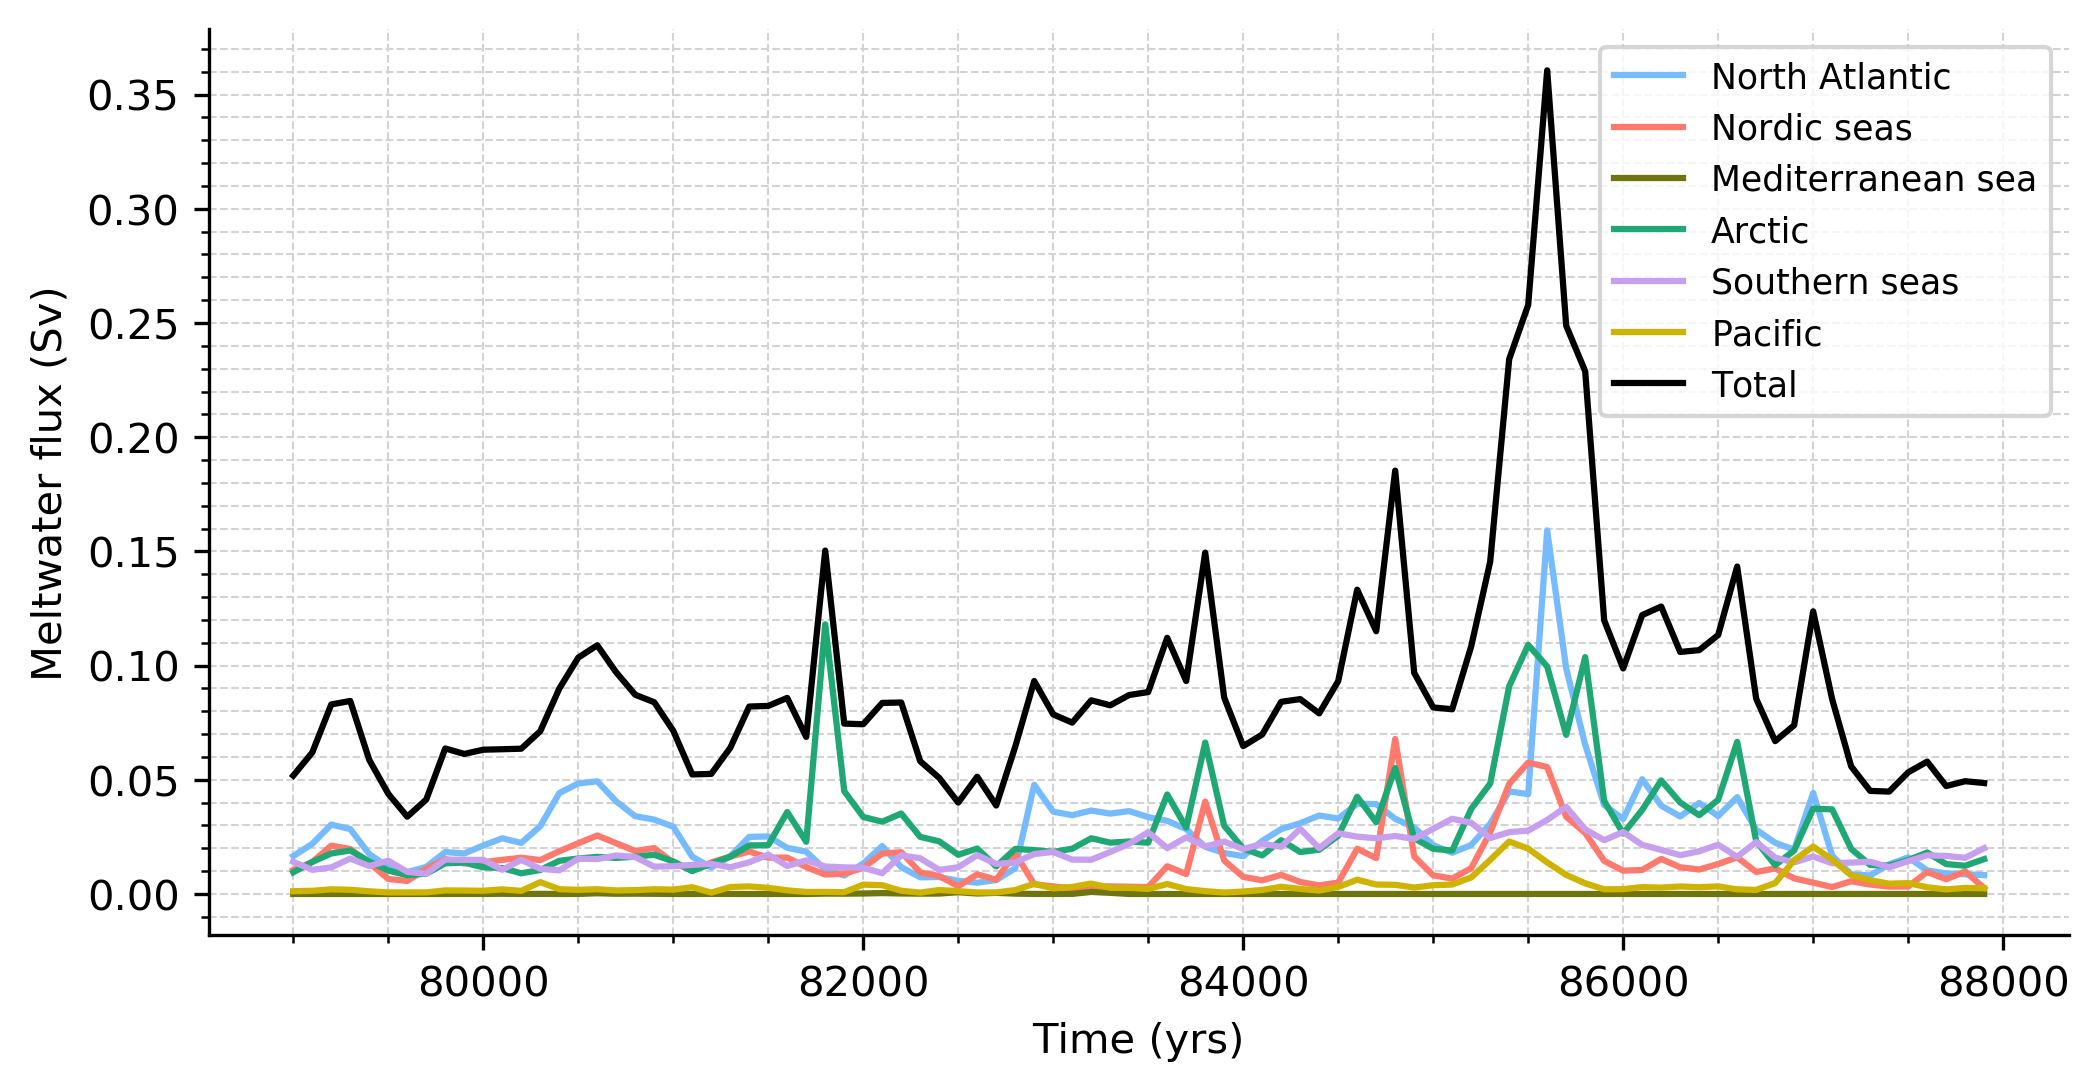

In [26]:
start, end = 0, 140

figMap, axMw = plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=300)

axMw.plot(t[start:end], flux_na[start:end], label="North Atlantic", color="xkcd:sky blue", linestyle="-")
axMw.plot(t[start:end], flux_ns[start:end], label="Nordic seas", color="xkcd:salmon", linestyle="-")
axMw.plot(t[start:end], flux_med[start:end], label="Mediterranean sea", color="xkcd:olive", linestyle="-")
axMw.plot(t[start:end], flux_arc[start:end], label="Arctic", color="xkcd:jade", linestyle="-")
axMw.plot(t[start:end], flux_ss[start:end], label="Southern seas", color="xkcd:lavender", linestyle="-")
axMw.plot(t[start:end], flux_pac[start:end], label="Pacific", color="xkcd:mustard", linestyle="-")
axMw.plot(t[start:end], flux_tot[start:end], label="Total", color="black", linestyle="-")

axMw.legend(loc="upper right", fontsize='small')
axMw.spines['right'].set_visible(False)
axMw.spines['top'].set_visible(False)
axMw.set_xlabel("Time (yrs)")
axMw.set_ylabel("Meltwater flux (Sv)")
axMw.minorticks_on()
axMw.grid(which = "both", color='lightgrey', linestyle='--', linewidth=0.5)

In [29]:
ds_discharge = xr.open_dataset('/nfs/see-fs-01_users/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.glac_ts.nc',decode_times=False)
ds_lsm = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.omask.nc')
ds_waterfix = xr.open_dataset("/nfs/annie/eeymr/work/data/glac_mw/qrparm.waterfix.hadcm3.nc")
ds_wfix_old = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.waterfix.nc')
# are ds_wfix and ds_wfix_old the same?

ts = plotting.create_discharge_ts(ds_discharge, ds_lsm, ds_waterfix, unit="kg/m2/s")
t = ds_discharge.t.values
i_minmw = np.where(t==-21500)
i_lgm1mw = np.where(t==-21000)
i_lgm2mw = np.where(t==-20700)
i_namw = np.where(t==-19400)
i_arcmw = np.where(t==-18200)
i_arc2mw = np.where(t==-17800)

flux_na = ts['North_Atlantic']
flux_ns = ts['Nordic seas']
flux_med = ts['Mediterranean']
flux_arc = ts['Arctic']
flux_ss = ts['Southern seas']
flux_pac = ts['Pacific']
flux_tot = ts['Total']

flux_minmw = [np.nanmean([ts['Total'][i] for i in range(i_minmw[0][0]-1,i_minmw[0][0]+1)])]*len(t)
flux_lgm1mw = [np.nanmean([ts['Total'][i] for i in range(i_lgm1mw[0][0]-1,i_lgm1mw[0][0]+1)])]*len(t)
flux_lgm2mw = [np.nanmean([ts['Total'][i] for i in range(i_lgm2mw[0][0]-1,i_lgm2mw[0][0]+1)])]*len(t)
flux_namw = [np.nanmean([ts['Total'][i] for i in range(i_namw[0][0]-1,i_namw[0][0]+1)])]*len(t)
flux_arcmw = [np.nanmean([ts['Total'][i] for i in range(i_arcmw[0][0]-1,i_arcmw[0][0]+1)])]*len(t)
flux_arc2mw = [np.nanmean([ts['Total'][i] for i in range(i_arc2mw[0][0]-1,i_arc2mw[0][0]+1)])+0.002]*len(t)

<generator object create_discharge_ts.<locals>.<genexpr> at 0x2b9ac8c57750>


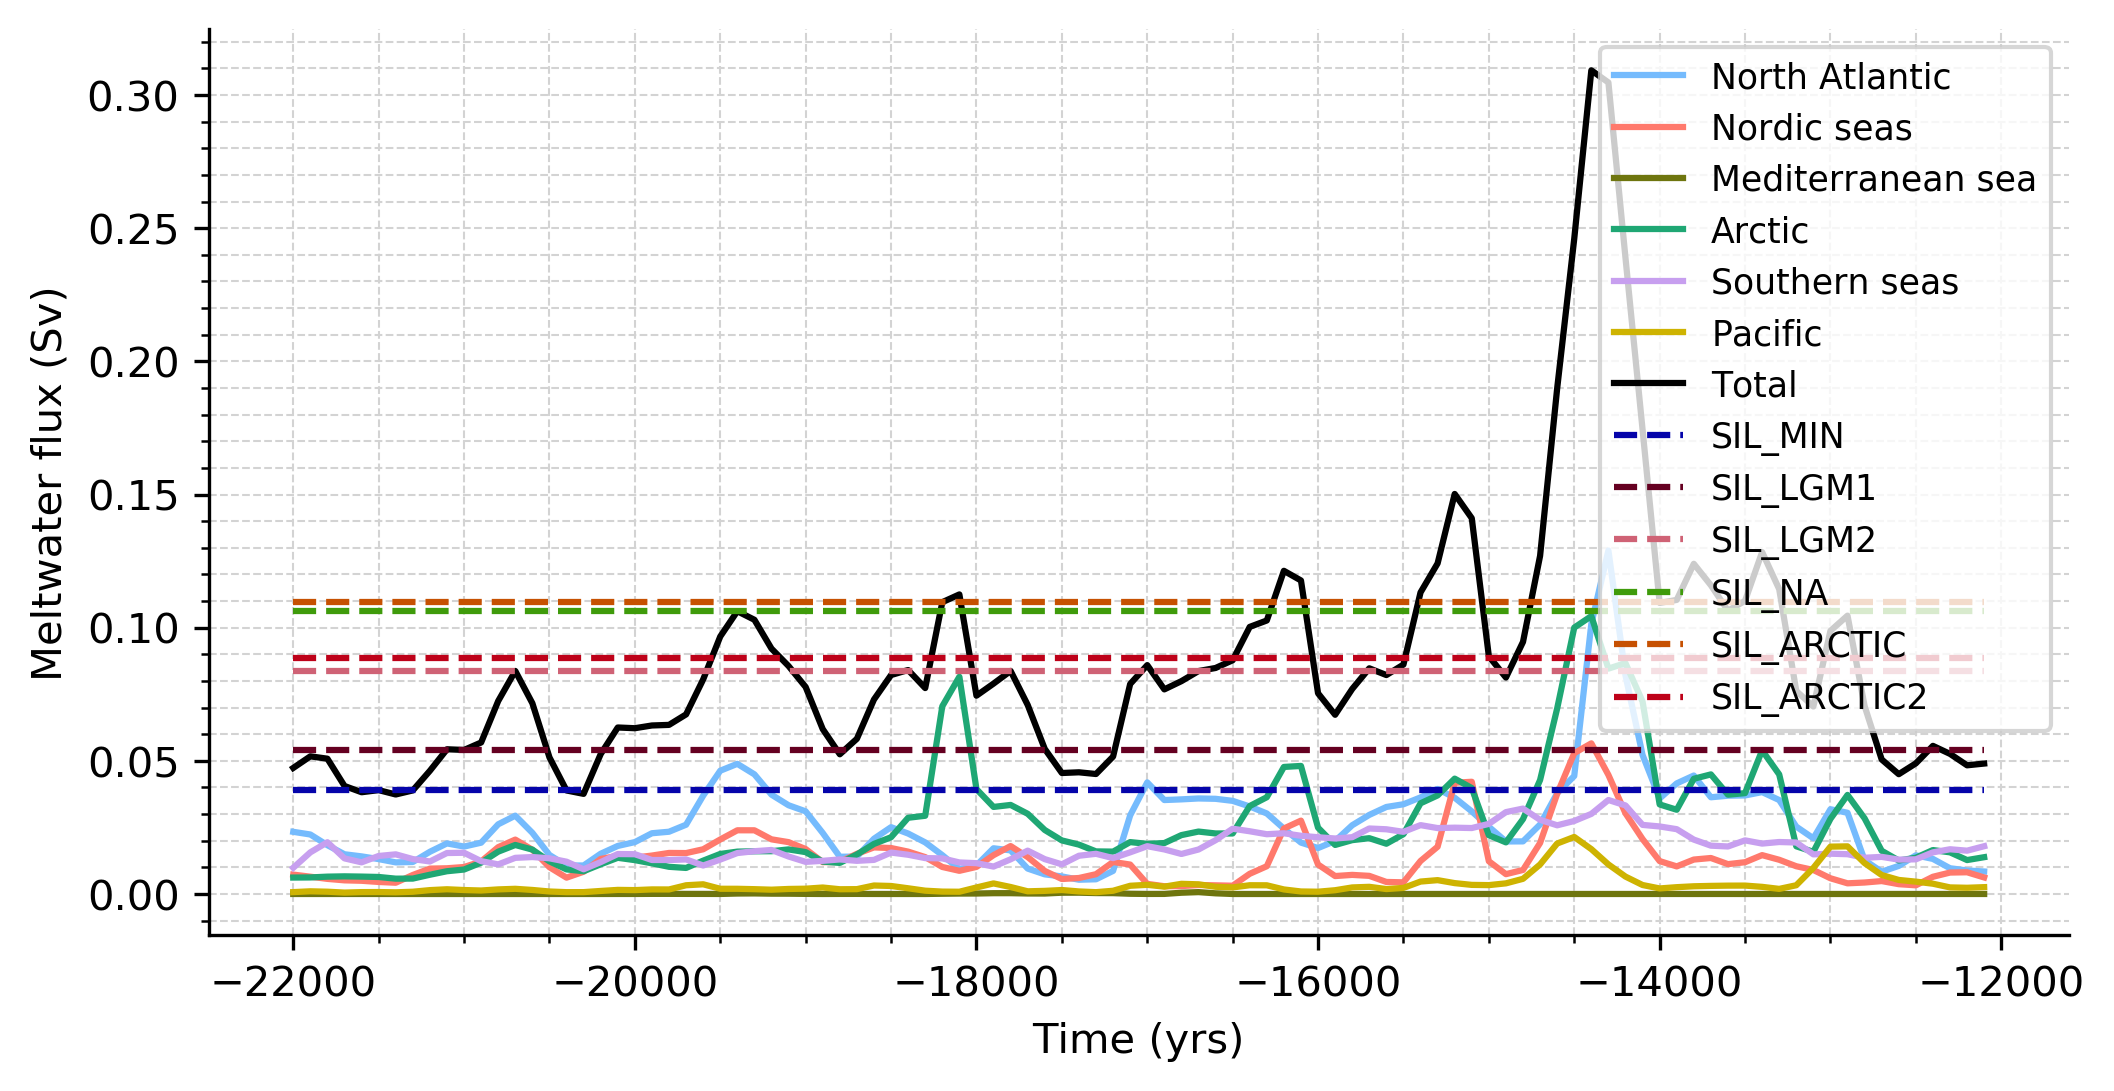

In [34]:
start, end = 40, 140

figMap, axMw = plt.subplots(nrows=1, ncols=1, figsize=(8,4), dpi=300)

axMw.plot(t[start:end], util.running_mean(flux_na[start:end],2), label="North Atlantic", color="xkcd:sky blue", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_ns[start:end],2), label="Nordic seas", color="xkcd:salmon", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_med[start:end],2), label="Mediterranean sea", color="xkcd:olive", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_arc[start:end],2), label="Arctic", color="xkcd:jade", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_ss[start:end],2), label="Southern seas", color="xkcd:lavender", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_pac[start:end],2), label="Pacific", color="xkcd:mustard", linestyle="-")
axMw.plot(t[start:end], util.running_mean(flux_tot[start:end],2), label="Total", color="black", linestyle="-")
axMw.plot(t[start:end], flux_minmw[start:end], label="SIL_MIN", color="xkcd:royal blue", linestyle="--")
axMw.plot(t[start:end], flux_lgm1mw[start:end], label="SIL_LGM1", color="xkcd:maroon", linestyle="--")
axMw.plot(t[start:end], flux_lgm2mw[start:end], label="SIL_LGM2", color="xkcd:rose", linestyle="--")
axMw.plot(t[start:end], flux_namw[start:end], label="SIL_NA", color="xkcd:grass green", linestyle="--")
axMw.plot(t[start:end], flux_arcmw[start:end], label="SIL_ARCTIC", color="xkcd:dark orange", linestyle="--")
axMw.plot(t[start:end], flux_arc2mw[start:end], label="SIL_ARCTIC2", color="xkcd:scarlet", linestyle="--")

axMw.legend(loc="upper right", fontsize='small')
axMw.spines['right'].set_visible(False)
axMw.spines['top'].set_visible(False)
axMw.set_xlabel("Time (yrs)")
axMw.set_ylabel("Meltwater flux (Sv)")
axMw.minorticks_on()
axMw.grid(which = "both", color='lightgrey', linestyle='--', linewidth=0.5)

In [8]:
ds_spread = xr.open_dataset('/nfs/annie/eeymr/work/outputs/glac_mw/Archive/glac.-26_0_100.diff_s/temev.discharge.glac_mw.nc',decode_times=False)
print(ds_spread)
ds_wfix_old = xr.open_dataset('/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.waterfix.nc')
print(ds_wfix_old)
print(f"Waterfix flux (Sv): {np.nansum(ds_wfix_old.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 261)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600 ... -300 -200 -100 0
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 356.25 357.5 358.75
Data variables:
    discharge  (t, latitude, longitude) float64 ...
Attributes:
    title:        Meltwater discharge for transient GLAC1D last delgaciation ...
    start_year:   -26
    end_year:     0
    step:         100
    mode:         spreaded
    mode_smooth:  diff
    lsm:          temev
    history:      Created 2020-06-04 18:27:59.417797 by Yvan Romé
<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-0

### Minimal LGM meltwater experiment

In [76]:
# Finding the local minimum

i_min = 40

for i in range(i_min, i_min+11):
    discharge = (ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_spread.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Index : 40; time step: -22000; waterfix flux (Sv): 0.04732791034176576
Index : 41; time step: -21900; waterfix flux (Sv): 0.05603663006529582
Index : 42; time step: -21800; waterfix flux (Sv): 0.04556630483789595
Index : 43; time step: -21700; waterfix flux (Sv): 0.03554336994344197
Index : 44; time step: -21600; waterfix flux (Sv): 0.04086983720652998
Index : 45; time step: -21500; waterfix flux (Sv): 0.03713327782600665
Index : 46; time step: -21400; waterfix flux (Sv): 0.03759323812941514
Index : 47; time step: -21300; waterfix flux (Sv): 0.04017841741137645
Index : 48; time step: -21200; waterfix flux (Sv): 0.05234097421501963
Index : 49; time step: -21100; waterfix flux (Sv): 0.0563390685322201
Index : 50; time step: -21000; waterfix flux (Sv): 0.05182371369649722


In [77]:
i_min = 45
discharge = np.nanmean([(ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2]) for i in range(i_min-1, i_min+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6
t = ds_spread.t.isel(t=i_min).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -21500; waterfix flux (Sv): 0.03900155751626832


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


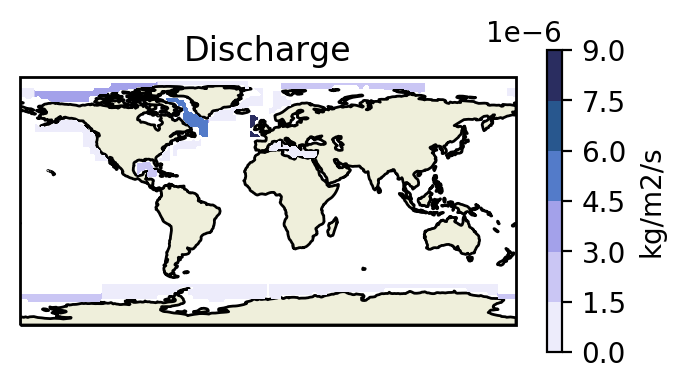

In [12]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_spread.longitude, ds_spread.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [9]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_min, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

Mew waterfix flux (Sv): 0.15146411566212872


Quick check-up

In [10]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm.nc")
print(ds_test)

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 358.75 360.0 361.25
  * latitude   (latitude) float32 -89.375 -88.125 -86.875 ... 88.125 89.375
  * depth      (depth) float32 5.0
  * t          (t) object 1800-12-01 00:00:00
Data variables:
    field672   (t, depth, latitude, longitude) float32 ...
Attributes:
    history:  Created on 2020-11-24 17:12:35.607907 by Yvan Romé
    title:    Waterfix for HadCM3 simulations [GLAC-1D] - Created using value...


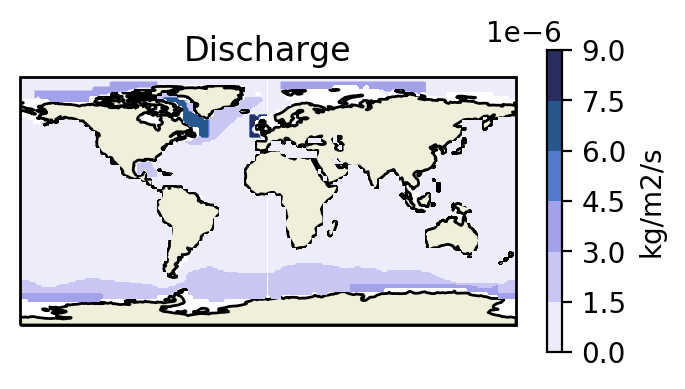

In [11]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_spread.longitude, ds_spread.latitude, ds_test.isel(t=0).isel(depth=0).field672[:,:-2], transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

### NA meltwater experiment

In [13]:
# Finding the local maximum

i_na = 60

for i in range(i_na, i_na+11):
    discharge = (ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_spread.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge)}")

Index : 60; time step: -20000; waterfix flux (Sv): 0.003430605616120044
Index : 61; time step: -19900; waterfix flux (Sv): 0.0031806411446346915
Index : 62; time step: -19800; waterfix flux (Sv): 0.0032015999404146965
Index : 63; time step: -19700; waterfix flux (Sv): 0.003892329032347949
Index : 64; time step: -19600; waterfix flux (Sv): 0.0066723799717830394
Index : 65; time step: -19500; waterfix flux (Sv): 0.008224674307835368
Index : 66; time step: -19400; waterfix flux (Sv): 0.008879257793669023
Index : 67; time step: -19300; waterfix flux (Sv): 0.007754291404141987
Index : 68; time step: -19200; waterfix flux (Sv): 0.006985065846523933
Index : 69; time step: -19100; waterfix flux (Sv): 0.006699197144725239
Index : 70; time step: -19000; waterfix flux (Sv): 0.00478977490265632


In [14]:
i_na = 66
discharge = np.nanmean([(ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2]) for i in range(i_na-1, i_na+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_spread.t.isel(t=i_na).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge)}")

Time step: -19400; waterfix flux (Sv): 0.008551966050752195


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


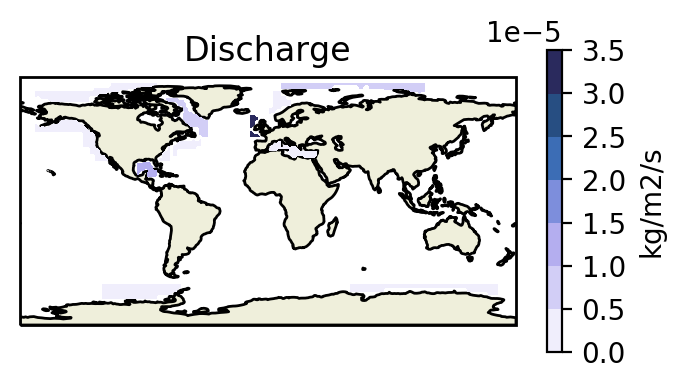

In [15]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_spread.longitude, ds_spread.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [16]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_na, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm_na.nc")

# print(f"Mew waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

Mew waterfix flux (Sv): 0.21864636033609783


In [22]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm_na.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.21864636033609783


### Arctic meltwater experiment

In [16]:
# Finding the local maximum

i_arc = 70

for i in range(i_arc, i_arc+11):
    discharge = (ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_spread.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Index : 70; time step: -19000; waterfix flux (Sv): 0.07148900002506625
Index : 71; time step: -18900; waterfix flux (Sv): 0.05234200474468374
Index : 72; time step: -18800; waterfix flux (Sv): 0.052582522676711395
Index : 73; time step: -18700; waterfix flux (Sv): 0.06396832047063673
Index : 74; time step: -18600; waterfix flux (Sv): 0.08207190060509113
Index : 75; time step: -18500; waterfix flux (Sv): 0.08234960188643285
Index : 76; time step: -18400; waterfix flux (Sv): 0.0858515630745549
Index : 77; time step: -18300; waterfix flux (Sv): 0.0687758577078454
Index : 78; time step: -18200; waterfix flux (Sv): 0.1503551547523929
Index : 79; time step: -18100; waterfix flux (Sv): 0.07460084447618322
Index : 80; time step: -18000; waterfix flux (Sv): 0.07432425457675526


In [17]:
i_arc = 78
discharge = np.nanmean([(ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])for i in range(i_arc-1, i_arc+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_spread.t.isel(t=i_arc).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -18200; waterfix flux (Sv): 0.10956550623011911


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


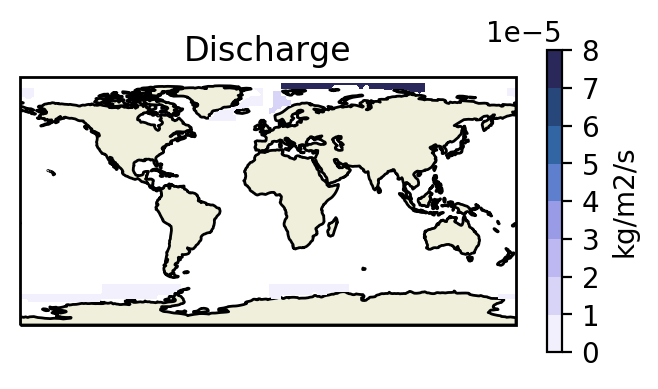

In [19]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_spread.longitude, ds_spread.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [21]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_arc, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm_arc.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

Mew waterfix flux (Sv): 0.22202806418557586


In [21]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm_arc.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.22202806418557586


### Small arctic event - 17.8 k

In [12]:
# Finding the local maximum

i_arc2 = 80

for i in range(i_arc, i_arc+11):
    discharge = (ds_spread.discharge.isel(t=i) - ds_wfix_old.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_spread.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Index : 80; time step: -18000; waterfix flux (Sv): 0.07432425457675526
Index : 81; time step: -17900; waterfix flux (Sv): 0.08365831983624142
Index : 82; time step: -17800; waterfix flux (Sv): 0.0838433753195278
Index : 83; time step: -17700; waterfix flux (Sv): 0.05812180270347474
Index : 84; time step: -17600; waterfix flux (Sv): 0.05082923583348149
Index : 85; time step: -17500; waterfix flux (Sv): 0.04002246839763563
Index : 86; time step: -17400; waterfix flux (Sv): 0.051359702543135294
Index : 87; time step: -17300; waterfix flux (Sv): 0.03874129794847419
Index : 88; time step: -17200; waterfix flux (Sv): 0.06446194976001686
Index : 89; time step: -17100; waterfix flux (Sv): 0.09323265903202486
Index : 90; time step: -17000; waterfix flux (Sv): 0.07862801342042718


In [16]:
i_arc2 = 82
discharge = np.nanmean([(ds_discharge.discharge.isel(t=i) - ds_waterfix.field672.values[0,0,:,:-2])for i in range(i_arc2-1, i_arc2+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_discharge.t.isel(t=i_arc2).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -17800; waterfix flux (Sv): 0.0837508475778846


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


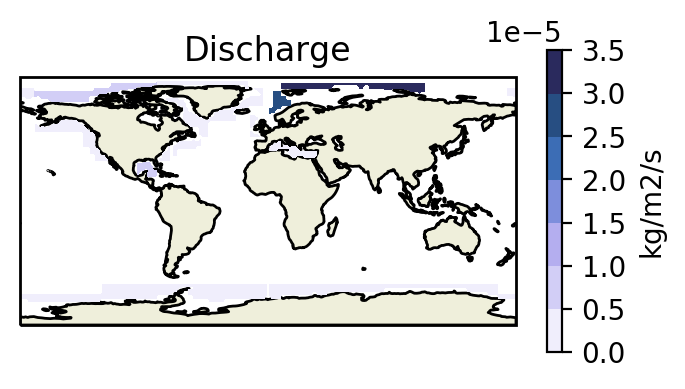

In [17]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_discharge.longitude, ds_discharge.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [18]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_arc2, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.arc2.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.196213406400329


In [19]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.arc2.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.196213406400329


### Intermediate LGM experiment - 21K

In [7]:
# Finding the local maximum

i_lgm1 = 50

for i in range(i_lgm1, i_lgm1+11):
    discharge = (ds_discharge.discharge.isel(t=i) - ds_waterfix.field672.values[0,0,:,:-2])
    discharge_sv = discharge*surface/ro*10**-6 
    t = ds_discharge.t.isel(t=i).values

    print(f"Index : {i}; time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Index : 50; time step: -21000; waterfix flux (Sv): 0.05182371369649722
Index : 51; time step: -20900; waterfix flux (Sv): 0.06194259853581164
Index : 52; time step: -20800; waterfix flux (Sv): 0.08298182963623041
Index : 53; time step: -20700; waterfix flux (Sv): 0.08451257324705753
Index : 54; time step: -20600; waterfix flux (Sv): 0.058710413905834376
Index : 55; time step: -20500; waterfix flux (Sv): 0.04389911525001095
Index : 56; time step: -20400; waterfix flux (Sv): 0.03384201601820437
Index : 57; time step: -20300; waterfix flux (Sv): 0.04134925671494318
Index : 58; time step: -20200; waterfix flux (Sv): 0.06371372193690822
Index : 59; time step: -20100; waterfix flux (Sv): 0.06132024814033279
Index : 60; time step: -20000; waterfix flux (Sv): 0.06317076325121233


In [9]:
i_lgm1 = 50
discharge = np.nanmean([(ds_discharge.discharge.isel(t=i) - ds_waterfix.field672.values[0,0,:,:-2])for i in range(i_lgm1-1, i_lgm1+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_discharge.t.isel(t=i_lgm1).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -21000; waterfix flux (Sv): 0.05408139111435866


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


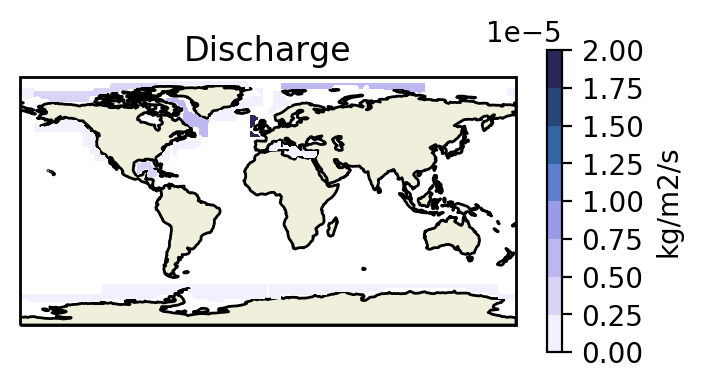

In [10]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_discharge.longitude, ds_discharge.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [11]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_lgm1, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm1.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.16654394822553364


In [23]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm1.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.16654394822553364


### Intermediate LGM experiment - 20.7K

In [13]:
i_lgm2 = 53
discharge = np.nanmean([(ds_discharge.discharge.isel(t=i) - ds_waterfix.field672.values[0,0,:,:-2])for i in range(i_lgm2-1, i_lgm2+1)], axis=0)
discharge_sv = discharge*surface/ro*10**-6 
t = ds_discharge.t.isel(t=i_lgm2).values
print(f"Time step: {t}; waterfix flux (Sv): {np.nansum(discharge_sv)}")

Time step: -20700; waterfix flux (Sv): 0.08374720144164398


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


/nfs/see-fs-01_users/eeymr/.conda/envs/eeymr/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


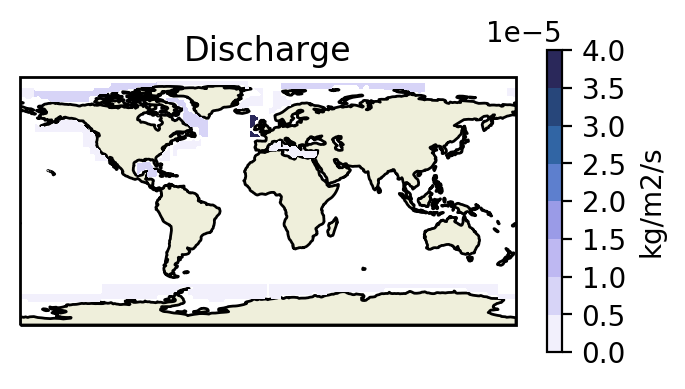

In [14]:
projection_map = ccrs.PlateCarree()
figMap,axMap = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection':projection_map}, figsize=(4,4), dpi=200)

cm = axMap.contourf(ds_discharge.longitude, ds_discharge.latitude, np.where(discharge>10**-10,discharge,np.nan), transform=ccrs.PlateCarree(), cmap=SCM6.devon.reversed())
axMap.set_global()
axMap.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axMap.set_title("Discharge")
cb = figMap.colorbar(mappable=cm, ax=axMap, label="kg/m2/s", shrink=0.5)
cb.formatter.set_powerlimits((0, 0))
cb.ax.yaxis.set_offset_position('right')                         
cb.update_ticks()

In [15]:
# and then create the new waterfix

# ds_updated = saving.create_updated_waterfix(discharge, i_lgm2, t, 'teadv3', ds_wfix_old, sav_path="/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm2.nc")

# print(f"New waterfix flux (Sv): {np.nansum(ds_updated.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.1962097591734412


In [24]:
ds_test = xr.open_dataset("/nfs/annie/eeymr/work/outputs/glac_mw/xoup/xoup.wfix.lgm2.nc")

print(f"New waterfix flux (Sv): {np.nansum(ds_test.field672.isel(t=0).isel(depth=0)[:,:-2]*surface/ro*10**-6)}")

New waterfix flux (Sv): 0.1962097591734412


### Uncorrected meltwater file (old method)

To create uncorrected routed and spreaded dataset, the syntax is:

In [24]:
ds_hice = xr.open_dataset('/nfs/annie/eeymr/work/data/glac_mw/GLAC1DHiceF26.nc')
ds_pointer = xr.open_dataset('/nfs/annie/eeymr/work/data/glac_mw/GLAC1DdrainagePointerF26ka.nc')
ds_wfix = xr.open_dataset("/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.waterfix.nc")
ds_lsm = xr.open_dataset("/nfs/annie/earpal/database/experiments/temev/inidata/temev.qrparm.omask.nc") 

Create routed file

In [29]:
routed_mw = routing.routing(ds_hice, ds_pointer, ds_lsm, mode_flux="Volume", mode_lon="double",
                            mode_shape="cross", mode_smooth="differential", t_debug=10)

saving.saving(routed_mw, ds_lsm, 'temev', mode="routed", start_year=-21, end_year=-20, step=100,
              mode_smooth="diff")

__ Routing algorithm
Reuse existing file: conservative_720x720_144x288.nc
____ Computation time step : 0.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 1.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 2.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 3.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 4.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mode.
____ Computation time step : 5.
____ Routing method.
____ Overlapping method with double-cross mode.
____ Applying mask processing with differential mo

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/annie/eeymr/work/outputs/proj_glac_mw/glac.-21_-20_100.diff'

Create spreaded file

In [ ]:
spreaded_mw = spreading.spreading(routed_mw, ds_lsm, ds_wfix)

saving.saving(spreaded_mw, ds_lsm, experiment, mode="spreaded", start_year=-21, end_year=-20, step=100,
              mode_smooth="diff")